# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

### Откройте файл с данными и изучите общую информацию.

In [49]:
#импортировали необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")
from IPython.display import display
import warnings
warnings.filterwarnings("ignore")

In [50]:
#изменим настройки для лучшего отображения данных:
#данные  float будут по умолчанию с 2-мя знаками после запятой. Увеличили количество отображаемых столбцов датафрейма.
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_columns = 100
#при первом знакомстве с данными было принято решение сразу воспользоваться параметром na_values для замены пропусков на 'NaN'.
data=pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv',sep='\t',na_values='NaN')
#посмотрим начало и конец датафрейма.
display(data.head())
data.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,"9,700,000.00",133.81,2017-03-21T00:00:00,3,3.70,5.00,73.30,3,NaN,False,False,13.83,NaN,Санкт-Петербург,"24,665.00","4,232.00",1.00,796.00,3.00,381.00,NaN
23695,14,"3,100,000.00",59.00,2018-01-15T00:00:00,3,NaN,5.00,38.00,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.00
23696,18,"2,500,000.00",56.70,2018-02-11T00:00:00,2,NaN,3.00,29.70,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,"11,475,000.00",76.75,2017-03-28T00:00:00,2,3.00,17.00,NaN,12,NaN,False,False,23.30,2.00,Санкт-Петербург,"39,140.00","10,364.00",2.00,173.00,3.00,196.00,602.00
23698,4,"1,350,000.00",32.30,2017-07-21T00:00:00,1,2.50,5.00,12.30,1,NaN,False,False,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


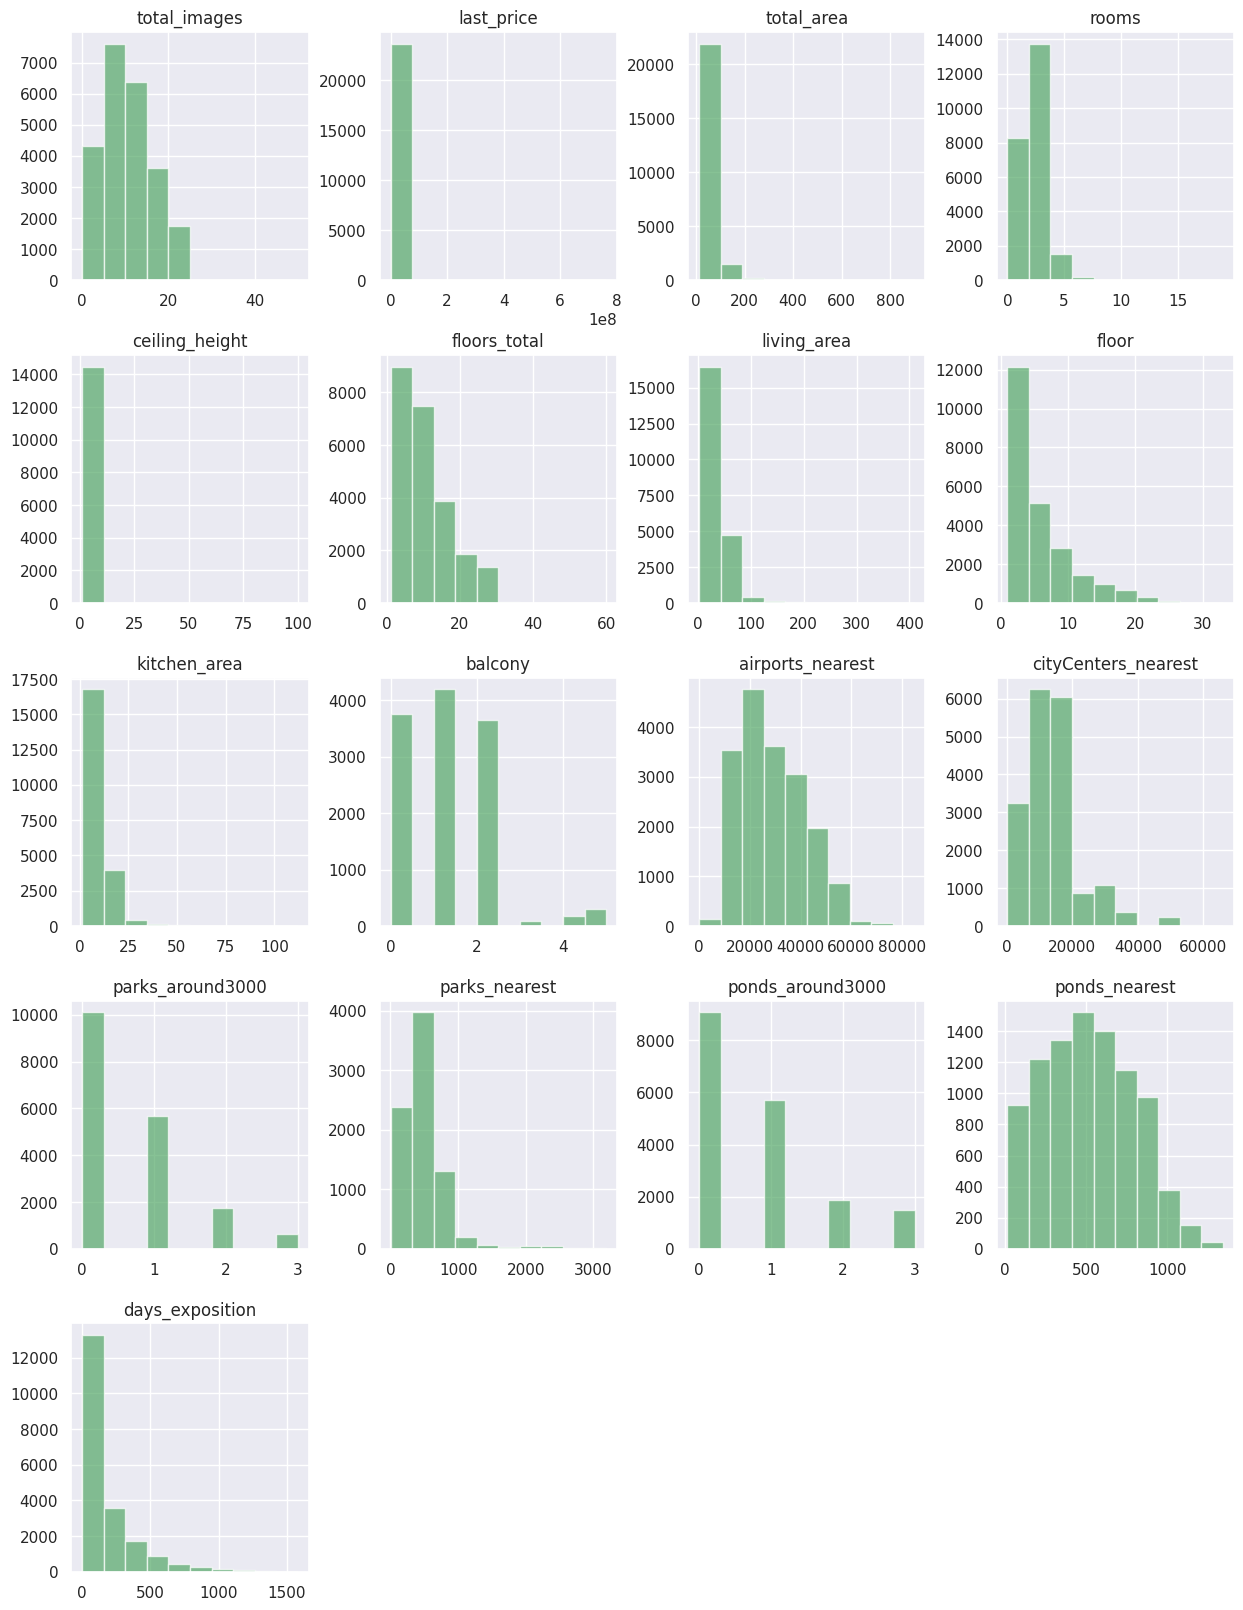

In [51]:
# построим гистограммы для детального знакомства с данными датафрейма.
data.hist(figsize=(15, 20),alpha=0.7, facecolor='g')
plt.xticks(rotation=30)
plt.ylabel('Частота')
plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Отлично </div>

In [52]:
#создадим копию датафрейма,чтобы иметь возможность сравнить с итоговым результатом.
data_raw=data.copy(deep=True)

In [53]:
#ознакомимся с количеством и типом данных.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [54]:
#посмотрим с какими данными мы имеем дело.
#Укажем percentile для большего охвата данных и включим в describe не только числовые данные,но и объекты.
data.describe(include = "all",percentiles=[.10,.25,.50,.75,.95])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"23,699.00","23,699.00","23,699.00",23699,"23,699.00","14,504.00","23,613.00","21,796.00","23,699.00",2775,23699,23699,"21,421.00","12,180.00",23650,"18,157.00","18,180.00","18,181.00","8,079.00","18,181.00","9,110.00","20,518.00"
unique,NaN,NaN,NaN,1491,NaN,NaN,NaN,NaN,NaN,2,2,2,NaN,NaN,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,2018-02-01T00:00:00,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN,NaN,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,368,NaN,NaN,NaN,NaN,NaN,2725,23550,23632,NaN,NaN,15721,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.86,"6,541,548.77",60.35,NaN,2.07,2.77,10.67,34.46,5.89,NaN,NaN,NaN,10.57,1.15,NaN,"28,793.67","14,191.28",0.61,490.80,0.77,517.98,180.89
std,5.68,"10,887,013.27",35.65,NaN,1.08,1.26,6.60,22.03,4.89,NaN,NaN,NaN,5.91,1.07,NaN,"12,630.88","8,608.39",0.80,342.32,0.94,277.72,219.73
min,0.00,"12,190.00",12.00,NaN,0.00,1.00,1.00,2.00,1.00,NaN,NaN,NaN,1.30,0.00,NaN,0.00,181.00,0.00,1.00,0.00,13.00,1.00
10%,2.00,"2,500,000.00",33.00,NaN,1.00,2.50,5.00,16.40,1.00,NaN,NaN,NaN,6.00,0.00,NaN,"13,461.00","4,766.00",0.00,159.00,0.00,145.00,17.00
25%,6.00,"3,400,000.00",40.00,NaN,1.00,2.52,5.00,18.60,2.00,NaN,NaN,NaN,7.00,0.00,NaN,"18,585.00","9,238.00",0.00,288.00,0.00,294.00,45.00
50%,9.00,"4,650,000.00",52.00,NaN,2.00,2.65,9.00,30.00,4.00,NaN,NaN,NaN,9.10,1.00,NaN,"26,726.00","13,098.50",0.00,455.00,1.00,502.00,95.00


#### Вывод

  Датафрейм с объявлениями по недвижимости содержит 23699 строк и 22 столбца.В данных присутствуют некорректные значения и пропуски. Так же присутствуют аномальные значения.

### Предобработка данных

#### Работа с пропусками

In [55]:
# посмотрим на долю пропусков к общей длинне датафрейма.
data.isnull(). mean()*100

total_images            0.00
last_price              0.00
total_area              0.00
first_day_exposition    0.00
rooms                   0.00
ceiling_height         38.80
floors_total            0.36
living_area             8.03
floor                   0.00
is_apartment           88.29
studio                  0.00
open_plan               0.00
kitchen_area            9.61
balcony                48.61
locality_name           0.21
airports_nearest       23.38
cityCenters_nearest    23.29
parks_around3000       23.28
parks_nearest          65.91
ponds_around3000       23.28
ponds_nearest          61.56
days_exposition        13.42
dtype: float64

In [56]:
#исправим название столбца 'cityCenters_nearest' согласно правилам хорошего тона.
data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'}, inplace=True)
#перейдем к фактическому заполнению пропусков.
data['ceiling_height'].fillna(data['ceiling_height'].median(),inplace=True)
#отсутствующие данные по 'floors_total' и 'locality_name' занимают мешьше 1% от всех данных датафрейма.
#принято решение удалить данные,т.к. отсутсвует информация,чем можно было бы заполнить их,а без них вывод не поменяется существенно.
data.dropna(subset=['floors_total'],how='all',inplace=True)
data.dropna(subset=['locality_name'],how='all',inplace=True)
#исходя из того,что продавцы не заполнили данные о наличии балкона или такую характеристику, как то,что
#недвижимость является апартаментами,говорит нам об отсутствии данных характеристик,в случае с балконом,
#либо о желании завысить цену,так как апартаменты обычно дешевле квартир на 10-15%. Заполним эти данные 0.
data['is_apartment'].fillna(0,inplace=True)
data['balcony'].fillna(0,inplace=True)
# незаполненность данных трактуем как отсутствие признака.Заполним пропуски 0.
data['parks_around3000'].fillna(0,inplace=True)
data['ponds_around3000'].fillna(0,inplace=True)

In [57]:
# Заменяем пустые значения жилой площади и площади кухни
living_ratio = data['living_area'].mean() / data['total_area'].mean()
kitchen_ratio = data['kitchen_area'].mean() / data['total_area'].mean()
data['living_area'].fillna(living_ratio * data['total_area'], inplace=True)
data['kitchen_area'].fillna(kitchen_ratio * data['total_area'], inplace=True)
data.isnull(). mean()*100

total_images            0.00
last_price              0.00
total_area              0.00
first_day_exposition    0.00
rooms                   0.00
ceiling_height          0.00
floors_total            0.00
living_area             0.00
floor                   0.00
is_apartment            0.00
studio                  0.00
open_plan               0.00
kitchen_area            0.00
balcony                 0.00
locality_name           0.00
airports_nearest       23.44
city_centers_nearest   23.34
parks_around3000        0.00
parks_nearest          65.92
ponds_around3000        0.00
ponds_nearest          61.65
days_exposition        13.46
dtype: float64

##### Вывод
    Проанализировав данные мы пришли к решению заполнить пропуски в следующих данных:
    'ceiling_height' - медианным значением по столбцу.
    'floors_total' и 'locality_name' - удалить строки с отсутствующими данными, т.к. строк с пропусками очень мало и их отсутствие на повлияет на окончательный вывод.
    'is_apartment','balcony' - заполнить 0 пропуски. Данные в этих столбцах,так же как и в столбце 'studio' относятся к бинарным данным. Мы можем трактовать эти пропуски в пользу отсутствия данных критериев у объектов недвижимости.
    'ponds_around3000','parks_around3000' - незаполненность данных по этим столбцам говорит нам об отсутствии этих  критериев.
    'kitchen_area' и 'living_area' были заполнены долями от средних значений имеющихся площадей к общей площади недвижимости.
    Было изменено название столбца 'cityCenters_nearest' на 'city_centers_nearest'.Остальные названия столбцов соответствуют правильному формату названий.

#### Удаление дубликатов.

In [58]:
#проанализируем количество явных дубликатов.
data.duplicated().sum()

0

##### Вывод
    Явных дубликатов в данных нет. Их дальнейшее выявление зависит только от чистки и приведению к единому формату данных.

#### Изменение типов данных.

In [59]:
convert_dict = {'is_apartment': bool,'balcony':int,'floors_total':int}
data=data.astype(convert_dict)
data.first_day_exposition=pd.to_datetime(data.first_day_exposition,format='%Y-%m-%d')
data.last_price=data.last_price.astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

##### Вывод
    Были изменены следующие столбцы с числовых данных с плавающей точкой на целочисленные:
        -'floors_total'
        -'balcony'
        -'last_price'.
    Эти данные либо физически не могут быть не целыми (количество балконов), либо изначально предоставлены в целочисленном виде и пандас просто не распознал правильно формат данных.
    Среди данных присутствует так же столбец с форматом даты и времени:
        -'first_day_exposition'
        Эти данные были проведены к формату datetime без учёта времени, т. к. оно было не информативно.

#### Проверка данных на аномалии и исправления.

In [60]:
# посмотрим бегло,какие данные имеются с помощью метода value_counts.
for i in data. columns. tolist():
  print (data[i].value_counts ())

10    1781
9     1721
20    1690
8     1580
7     1513
6     1477
11    1361
5     1282
12    1220
0     1051
13    1011
14     986
4      968
15     947
1      860
16     760
3      756
17     649
18     642
2      634
19     601
23      16
21      12
24       8
22       8
26       5
32       4
28       4
50       3
29       3
27       2
30       2
35       2
31       2
42       1
25       1
39       1
37       1
Name: total_images, dtype: int64
4500000     341
3500000     289
4300000     260
4000000     260
4200000     258
           ... 
7778000       1
12890000      1
29375000      1
7545600       1
11475000      1
Name: last_price, Length: 2925, dtype: int64
45.00     419
42.00     383
31.00     346
60.00     346
44.00     343
         ... 
130.21      1
58.71       1
60.75       1
63.19       1
76.75       1
Name: total_area, Length: 2159, dtype: int64
2018-02-01    366
2017-11-10    240
2017-10-13    124
2017-09-27    111
2018-03-26     97
             ... 
2015-05-09      1
201

##### Исправление данных в столбце 'locality_name'.

In [61]:
#посмотрим названия населенных пунктов в 'locality_name'. Отметим,что уникальных названий 364 единицы.
display(data.locality_name.nunique())
data.locality_name.unique()

364

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [62]:
#создадим функцию для приведения 'locality_name' к единому формату.
def last_name_for_location(name):
  sep_name=name.split()
  final_name=[]
  for i in sep_name:
    if i.istitle():
      final_name.append(i)
  return ' '. join(final_name)
data['new_local_name']=data['locality_name'].apply(last_name_for_location)
# проверим,как прошла обработка данных в new_local_name'
data.loc[:,['locality_name','new_local_name']].sample(15)

,locality_name,new_local_name
6508,деревня Белогорка,Белогорка
1359,Санкт-Петербург,Санкт-Петербург
20455,Санкт-Петербург,Санкт-Петербург
7208,Красное Село,Красное Село
4101,Санкт-Петербург,Санкт-Петербург
23343,Санкт-Петербург,Санкт-Петербург
15354,Санкт-Петербург,Санкт-Петербург
8124,Санкт-Петербург,Санкт-Петербург
4710,Санкт-Петербург,Санкт-Петербург
20815,Санкт-Петербург,Санкт-Петербург


In [63]:
# посмотрим названия населенных пунктов в 'locality_name'
# предварительно заменив ё на е для дальнейшей проверки на дубликаты.
data['new_local_name'] = data['new_local_name'].str.replace('ё', 'е')
display(data.new_local_name.nunique())
data.new_local_name.unique()

305

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодежное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

    Отметим,что до обработки данных уникальных названий серии 'locality_name' было 364 единицы,а после обработки в новой серии 'new_local_name' стало 305 единиц.

In [64]:
# удалим стобец 'locality_name'.
data.drop('locality_name', axis=1, inplace=True)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,new_local_name
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN,Санкт-Петербург
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00,Шушары
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00,Санкт-Петербург
3,0,64900000,159.00,2015-07-24,3,2.65,14,90.82,9,False,False,False,27.84,0,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00,Санкт-Петербург
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00,Санкт-Петербург


In [65]:
# проверим на наличие дубликатов.
data.duplicated().sum()

0

###### Вывод:
  Отбросив территориальный признак и заменив букву "ё" на "е" мы привели данные к единому виду тем самым уменьшив количество уникальных названий населённых пунтов с 364 до 305 единиц. Проверка на явные дубликаты не выявила таковых, следовательно по остальным параметрам, помимо названия населённого пункта, есть различия.


##### Исправление данных в столбце 'last_price'.

In [66]:
# проанализируем серию 'last_price'.
display (data.last_price.describe())
data.last_price.value_counts(bins=10,sort=False)

count        23,565.00
mean      6,540,058.26
std      10,910,934.72
min          12,190.00
25%       3,400,000.00
50%       4,646,000.00
75%       6,790,000.00
max     763,000,000.00
Name: last_price, dtype: float64

(-750797.8110000001, 76310971.0]    23498
(76310971.0, 152609752.0]              52
(152609752.0, 228908533.0]              6
(228908533.0, 305207314.0]              5
(305207314.0, 381506095.0]              1
(381506095.0, 457804876.0]              2
(457804876.0, 534103657.0]              0
(534103657.0, 610402438.0]              0
(610402438.0, 686701219.0]              0
(686701219.0, 763000000.0]              1
Name: last_price, dtype: int64

Минимальное значение цены 12_190 не соответствует действительности и говорит нам о выбросе. Отфильтруем данные по этому показателю.

In [67]:
#посмотрим на строку с такими "эксклюзивными" ценами.
data.query('last_price==12_190')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,new_local_name
8793,7,12190,109.00,2019-03-20,2,2.75,25,32.00,25,False,False,False,40.50,0,"36,421.00","9,176.00",1.00,805.00,0.00,NaN,8.00,Санкт-Петербург


Посмотрим порядок цен у похожих квартир.

In [68]:
#сделаем фильтр по общей площади и дням экспозиции объявления о продаже и посмотрим цены.
data. query ('115>=total_area>=109 and 8>=days_exposition<=10')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,new_local_name
8793,7,12190,109.00,2019-03-20,2,2.75,25,32.00,25,False,False,False,40.50,0,"36,421.00","9,176.00",1.00,805.00,0.00,NaN,8.00,Санкт-Петербург
19382,9,20786000,109.00,2018-07-16,2,3.00,7,62.26,4,False,False,False,53.00,0,"24,283.00","4,850.00",2.00,335.00,0.00,NaN,5.00,Санкт-Петербург
22667,12,9300000,112.20,2018-09-11,3,3.20,5,84.50,5,False,False,False,11.80,0,"24,085.00","4,653.00",2.00,476.00,0.00,NaN,6.00,Санкт-Петербург


Заменим значение на 12_190_000:

In [69]:
#отфильтруем строку с ошибкой в цене и присвоим ей новое значение.
data. loc[8793, 'last_price']=data. loc[8793, 'last_price']*1000

In [70]:
data['last_price'].describe()

count        23,565.00
mean      6,540,575.04
std      10,910,913.92
min         430,000.00
25%       3,400,000.00
50%       4,647,000.00
75%       6,790,000.00
max     763,000,000.00
Name: last_price, dtype: float64

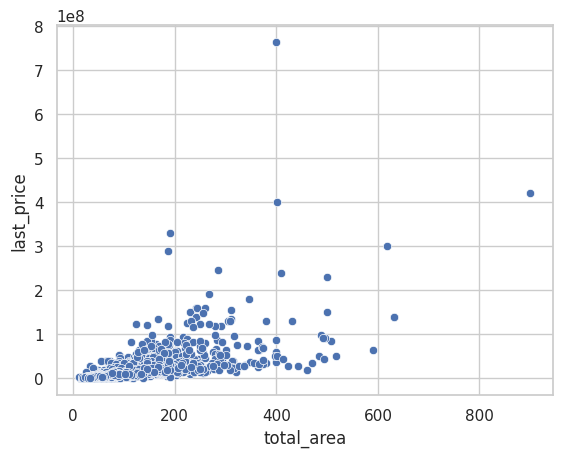

In [71]:
sns.set_style("whitegrid")
sns.scatterplot(data=data[['last_price', 'total_area']],  y="last_price", x="total_area")
plt.show()

Предварительно, рассматривая график по зависимости цены от общей площади, можно сказать, что распределение имеет линейный характер.

######  Вывод:
  Рассматривая данные по цене недвижимости была выявлена аномалия в виде цены 12_190.Ориентируясь на порядок цен других квартир с такой же, примерно, площадью и с таким количеством дней до продажи, было принято решение умножить показатель на 1_000.

##### Исправление данных в столбцах 'total_area', 'living_area', 'kitchen_area','is_apartment','rooms' ,'studio', ' open_plan','floor','floors_total' и 'balcony'.

In [72]:
area=pd.DataFrame({
    'kitchen_area': data['kitchen_area'].describe(),
    'living_area': data['living_area'].describe(),
    'total_area': data['total_area'].describe(),
    'is_apartment': data['is_apartment'].describe(),
    'balcony': data['balcony'].describe(),
    'rooms': data['rooms'].describe(),
    'studio': data['studio'].describe(),
    'open_plan': data['open_plan'].describe(),
    'floor': data['floor'].describe(),
    'floors_total': data['floors_total'].describe()})
area

,kitchen_area,living_area,total_area,is_apartment,balcony,rooms,studio,open_plan,floor,floors_total
25%,7.00,19.00,40.00,NaN,0.00,1.00,NaN,NaN,2.00,5.00
50%,9.00,30.00,52.00,NaN,0.00,2.00,NaN,NaN,4.00,9.00
75%,12.00,42.10,69.70,NaN,1.00,3.00,NaN,NaN,8.00,16.00
count,"23,565.00","23,565.00","23,565.00",23565,"23,565.00","23,565.00",23565,23565,"23,565.00","23,565.00"
freq,NaN,NaN,NaN,23515,NaN,NaN,23419,23498,NaN,NaN
max,112.00,409.70,900.00,NaN,5.00,19.00,NaN,NaN,33.00,60.00
mean,10.50,34.59,60.32,NaN,0.59,2.07,NaN,NaN,5.88,10.68
min,1.30,2.00,12.00,NaN,0.00,0.00,NaN,NaN,1.00,1.00
std,6.04,22.37,35.66,NaN,0.96,1.08,NaN,NaN,4.87,6.59
top,NaN,NaN,NaN,False,NaN,NaN,False,False,NaN,NaN


In [73]:
# посмотрим на распределение по площади кухни.
data. kitchen_area.value_counts(bins=15, sort=False)

(1.1880000000000002, 8.68]    10364
(8.68, 16.06]                 11040
(16.06, 23.44]                 1384
(23.44, 30.82]                  425
(30.82, 38.2]                   162
(38.2, 45.58]                   103
(45.58, 52.96]                   33
(52.96, 60.34]                   20
(60.34, 67.72]                   15
(67.72, 75.1]                     8
(75.1, 82.48]                     2
(82.48, 89.86]                    3
(89.86, 97.24]                    2
(97.24, 104.62]                   2
(104.62, 112.0]                   2
Name: kitchen_area, dtype: int64

In [74]:
# посмотрим на распределение по общей площади.
data.  total_area.value_counts(bins=15, sort=False)

(11.111, 71.2]    18062
(71.2, 130.4]      4670
(130.4, 189.6]      569
(189.6, 248.8]      146
(248.8, 308.0]       60
(308.0, 367.2]       24
(367.2, 426.4]       16
(426.4, 485.6]        5
(485.6, 544.8]        8
(544.8, 604.0]        1
(604.0, 663.2]        3
(663.2, 722.4]        0
(722.4, 781.6]        0
(781.6, 840.8]        0
(840.8, 900.0]        1
Name: total_area, dtype: int64

In [75]:
# посмотрим на распределение по жилой площади.
data.living_area.value_counts(bins=15, sort=False)

(1.5910000000000002, 29.18]    10888
(29.18, 56.36]                 10529
(56.36, 83.54]                  1463
(83.54, 110.72]                  388
(110.72, 137.9]                  121
(137.9, 165.08]                   84
(165.08, 192.26]                  41
(192.26, 219.44]                  16
(219.44, 246.62]                   9
(246.62, 273.8]                   12
(273.8, 300.98]                    6
(300.98, 328.16]                   3
(328.16, 355.34]                   2
(355.34, 382.52]                   1
(382.52, 409.7]                    2
Name: living_area, dtype: int64

In [76]:
#проверим на превышение суммы жилой и кухни над общей площадью.
display (data.loc[data['total_area']<(data['kitchen_area']+data['living_area']),['living_area','kitchen_area','total_area']])
data=data[data['total_area']>(data['kitchen_area']+data['living_area'])]
data.info ()

,living_area,kitchen_area,total_area
184,26.10,6.20,30.20
424,88.00,17.16,98.00
440,24.75,4.75,27.11
545,20.00,5.00,23.80
551,30.55,9.28,31.59
...,...,...,...
22246,23.30,4.78,27.30
22907,200.00,39.92,228.00
23102,55.50,11.55,66.00
23191,16.00,3.31,18.90


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23376 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23376 non-null  int64         
 1   last_price            23376 non-null  int64         
 2   total_area            23376 non-null  float64       
 3   first_day_exposition  23376 non-null  datetime64[ns]
 4   rooms                 23376 non-null  int64         
 5   ceiling_height        23376 non-null  float64       
 6   floors_total          23376 non-null  int64         
 7   living_area           23376 non-null  float64       
 8   floor                 23376 non-null  int64         
 9   is_apartment          23376 non-null  bool          
 10  studio                23376 non-null  bool          
 11  open_plan             23376 non-null  bool          
 12  kitchen_area          23376 non-null  float64       
 13  balcony         

In [77]:
#проверим на несоответствие жилой площади и кухни хотя бы 50% общей площади.
display(data.loc[data['total_area']*0.5>(data['kitchen_area']+data['living_area']),['living_area','kitchen_area','total_area']])
data=data[data['total_area']*0.5<(data['kitchen_area']+data['living_area'])]

,living_area,kitchen_area,total_area
248,10.00,5.43,31.00
331,37.10,14.10,124.80
567,38.60,10.00,106.90
1253,29.41,17.53,127.00
2003,55.00,17.00,215.00
...,...,...,...
23359,10.00,6.33,36.13
23394,13.00,10.00,92.00
23549,55.70,24.50,184.00
23555,57.40,12.40,158.50


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,new_local_name
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00,Шушары
28,8,4170000,44.00,2017-12-13,1,2.90,6,20.80,1,False,False,False,11.70,1,"18,557.00","30,710.00",0.00,NaN,1.00,118.00,74.00,Пушкин
68,11,4150000,74.00,2017-08-04,3,2.80,5,44.00,1,False,False,False,8.00,2,NaN,NaN,0.00,NaN,0.00,NaN,234.00,Федоровское
80,8,4050000,79.10,2018-02-23,3,3.00,15,45.23,1,False,False,False,11.95,1,NaN,NaN,0.00,NaN,0.00,NaN,235.00,Новое Девяткино
202,6,4700000,67.00,2017-04-29,3,2.70,9,43.40,1,False,False,False,8.80,2,"15,361.00","14,157.00",0.00,NaN,0.00,NaN,339.00,Санкт-Петербург
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22873,12,6800000,52.40,2016-01-15,2,2.70,5,27.10,1,False,False,False,12.10,1,"17,907.00","30,060.00",1.00,235.00,1.00,232.00,347.00,Пушкин
22962,12,5200000,70.00,2017-02-28,3,2.56,9,42.00,1,False,False,False,9.00,1,"36,606.00","13,409.00",1.00,627.00,1.00,734.00,365.00,Санкт-Петербург
23104,7,4650000,57.60,2018-01-12,3,2.55,9,42.00,1,False,False,False,6.00,2,"12,873.00","15,464.00",0.00,NaN,1.00,909.00,54.00,Санкт-Петербург
23206,16,7690000,69.00,2018-02-01,3,2.50,10,43.10,1,False,False,False,8.30,2,"36,592.00","12,113.00",0.00,NaN,0.00,NaN,100.00,Санкт-Петербург


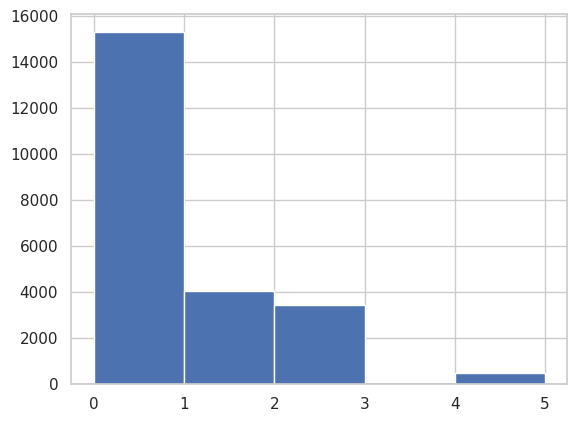

In [78]:
# Отфильтруем данные исходя из того, что балконы крайне редко встречаются в многоквартирных домах на 1 этаже
display (data.loc[(data.floor==1) & (data. balcony>0) & (data.floors_total>=5)])
data.loc[(data.floor==1) & (data. balcony>0) & (data.floors_total>=5),'balcony']=0
data. balcony. hist(bins=5)
plt. show()

In [79]:
#проверим, что однокомнатная квартира не менее 14 м2. Отфильтрованные квартиры переведем в статус апартаментов.
display(data. loc[(data.living_area<14)& (data.rooms==1), ['total_area', 'living_area', 'kitchen_area','is_apartment','studio','balcony','rooms']].sort_values ('living_area'))
data. loc[(data.living_area<14)& (data.rooms==1), 'is_apartment']=True

,total_area,living_area,kitchen_area,is_apartment,studio,balcony,rooms
16431,31.00,6.00,17.00,False,False,0,1
19251,33.00,6.50,18.00,False,False,0,1
19546,13.00,7.43,2.28,False,False,0,1
17961,13.00,7.43,2.28,False,False,0,1
19558,13.20,7.54,2.31,False,False,0,1
...,...,...,...,...,...,...,...
1074,43.98,13.90,20.52,False,False,2,1
15913,33.60,13.90,9.80,False,False,1,1
7362,41.76,13.92,11.37,True,False,2,1
11480,47.72,13.92,23.28,False,False,0,1


In [80]:
#Квартиры с кухней площадью меньше 5 метров переведем в студии.
display (data.loc[(data.kitchen_area<5)|(data.rooms==0), ['total_area', 'living_area', 'kitchen_area', 'rooms','studio','is_apartment']].sort_values ('kitchen_area'))
data.loc[(data.kitchen_area<5)|(data.rooms==0), 'studio']=True

,total_area,living_area,kitchen_area,rooms,studio,is_apartment
20217,28.50,19.50,1.30,1,False,False
6262,24.00,16.00,2.00,2,False,False
11033,32.00,16.00,2.00,1,False,False
906,27.00,18.00,2.00,1,False,False
21419,20.00,14.00,2.00,1,False,False
...,...,...,...,...,...,...
10008,44.20,32.20,7.74,0,True,False
13613,58.40,33.00,10.22,0,True,False
3458,73.60,50.00,12.89,0,True,False
20082,98.40,60.50,17.23,0,True,False


In [81]:
# отфильтруем и удалим из датафрейма данные о нулевом количестве комнат и о нулевом расстоянии до аэропорта.
display (data. query ('rooms==0 or studio==True'))
data. query ('airports_nearest==0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,new_local_name
76,12,2800000,55.10,2016-05-14,3,2.60,5,38.40,1,False,True,False,4.90,0,NaN,NaN,0.00,NaN,0.00,NaN,606.00,Кировск
144,1,2450000,27.00,2017-03-30,0,2.65,24,15.50,2,False,True,False,4.73,2,NaN,NaN,0.00,NaN,0.00,NaN,181.00,Мурино
298,9,2650000,42.80,2017-04-25,2,2.65,5,30.00,3,False,True,False,4.50,0,NaN,NaN,0.00,NaN,0.00,NaN,49.00,Гатчина
322,6,2000000,25.00,2017-02-07,1,2.65,5,14.28,5,False,True,False,4.38,0,NaN,NaN,0.00,NaN,0.00,NaN,45.00,Выборг
349,4,2320000,25.00,2017-09-27,0,2.65,14,17.00,1,False,True,True,4.38,0,NaN,NaN,0.00,NaN,0.00,NaN,45.00,Кудрово
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23554,15,3350000,26.00,2018-09-07,0,2.65,19,14.85,8,False,True,False,4.55,0,"18,090.00","17,092.00",0.00,NaN,2.00,112.00,31.00,Санкт-Петербург
23579,7,2350000,24.80,2018-06-07,1,2.65,10,18.00,2,False,True,False,4.34,0,NaN,NaN,0.00,NaN,0.00,NaN,89.00,Кудрово
23592,10,1450000,29.00,2017-11-11,0,2.65,9,18.00,8,False,True,True,5.08,2,NaN,NaN,0.00,NaN,0.00,NaN,82.00,Никольское
23637,8,2350000,26.00,2018-06-26,0,2.65,25,17.00,4,False,True,False,4.55,2,NaN,NaN,0.00,NaN,0.00,NaN,207.00,Бугры


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,new_local_name
21085,0,7000000,34.70,2018-09-23,1,2.70,9,19.80,3,False,False,False,6.00,2,0.00,"22,801.00",0.00,NaN,0.00,NaN,60.00,Санкт-Петербург


In [82]:
#переведем квартиры с нулевым количеством комнат в статус студий и удалим строку с квартирой в аэропорту.
data.loc[data.rooms==0,'studio']==True
data=data[data.airports_nearest!=0]
data.describe (include='all')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,new_local_name
count,"23,291.00","23,291.00","23,291.00",23291,"23,291.00","23,291.00","23,291.00","23,291.00","23,291.00",23291,23291,23291,"23,291.00","23,291.00","17,838.00","17,861.00","23,291.00","7,936.00","23,291.00","8,933.00","20,155.00",23291
unique,NaN,NaN,NaN,1486,NaN,NaN,NaN,NaN,NaN,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,2018-02-01 00:00:00,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Санкт-Петербург
freq,NaN,NaN,NaN,364,NaN,NaN,NaN,NaN,NaN,22953,22841,23229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15469
first,NaN,NaN,NaN,2014-11-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2019-05-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.88,"6,516,520.72",60.20,NaN,2.07,2.72,10.67,34.54,5.87,NaN,NaN,NaN,10.47,0.57,"28,799.25","14,203.40",0.47,490.69,0.59,518.43,181.09,NaN
std,5.67,"10,882,438.55",35.28,NaN,1.08,0.73,6.58,22.31,4.86,NaN,NaN,NaN,5.99,0.95,"12,635.08","8,612.30",0.75,340.26,0.88,278.02,220.04,NaN
min,0.00,"430,000.00",13.00,NaN,0.00,1.00,1.00,6.00,1.00,NaN,NaN,NaN,1.30,0.00,"6,450.00",181.00,0.00,1.00,0.00,13.00,1.00,NaN
25%,6.00,"3,429,500.00",40.00,NaN,1.00,2.60,5.00,19.00,2.00,NaN,NaN,NaN,7.00,0.00,"18,551.00","9,265.00",0.00,288.00,0.00,293.00,45.00,NaN


In [83]:
#Проверим общее количество этажей.
#Сейчас самое большое количество этажей в здании Лидер Тауэр - 42 этажа. Лахта-центр на 88 этажей ещё не сдано.

display(sorted(data.floors_total.unique()))

num_floor=data.floor
print(data.query('@num_floor>floors_total'))
print(data.query('floors_total>37'))
data.loc[2253,'floors_total']=6
data=data.loc[data.floors_total<=37,]
data.shape[0]

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 33,
 34,
 35,
 36,
 37,
 52,
 60]

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, airports_nearest, city_centers_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition, new_local_name]
Index: []
       total_images  last_price  total_area first_day_exposition  rooms  \
2253             12     3800000       45.50           2018-06-28      2   
16731             9     3978000       40.00           2018-09-24      1   

       ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
2253             2.88            60        27.40      4         False   False   
16731            2.65            52        10.50     18          True   False   

       open_plan  kitchen_area  balcony  airports_nearest  \
2253       False          7.40        0         67,763.00   
16731      False         14.00        0         20,728.00   

23290

######  Вывод:
    В данном разделе аналитической работы были рассмотрены распределения по количеству площади квартир (жилая, кухня, общая). Так же были исправлены или удалены следующие аномальные значения по параметрам:
    -удалены строки с превышением суммы жилой площади и кухни над общей площадью;
    -удалены строки не соответствующие жилой площади и кухни хотя бы 50% общей площади;
    -заменены 0 количество балконов на 1 этаже в домах с количеством этажей больше 5,т.к. это крайне редкое явление в виде самостоятельной пристройки, требующее длительного согласования с Жилинспецией;
    -однокомнатные квартиры с площадью менее 14 м2 или квартиры с кухней менее 5м2 - переведены в статус апартаментов;
    -удалены строки с 0 расстоянием до аэропорта.
    -проверено,что номер этажа в рамках одного объявления не превышает количество этажей в этом же доме.
    -Исправлена 1 строка с 60 этажами в доме на 6 этажей,т.к. в Кронштадте существуют 6-этажные дома и крайне вероятно,что это опечатка.
    -квартиры с 0-м количеством комнат переведены в статус -Студия.
    -Удалена строка с 52 этажами в доме,т.к. это объявление с дислокацией в Санкт-Петербурге,а там самое большое количество этажей в здании Лидер Тауэр - 42 этажа. Лахта-центр на 88 этажей ещё не сдано,поэтому пока что не существует здания с 52 этажами и на что можно было бы исправить тоже не ясно.


##### Исправление данных в столбце 'ceiling_height'.

(0.968, 2.55]     4794
(2.55, 4.1]      18430
(4.1, 5.65]         39
(5.65, 7.2]          1
(7.2, 8.75]          4
(8.75, 10.3]         1
(10.3, 11.85]        0
(11.85, 13.4]        0
(13.4, 14.95]        1
(14.95, 16.5]        0
(16.5, 18.05]        0
(18.05, 19.6]        0
(19.6, 21.15]        1
(21.15, 22.7]        1
(22.7, 24.25]        1
(24.25, 25.8]        7
(25.8, 27.35]        8
(27.35, 28.9]        0
(28.9, 30.45]        0
(30.45, 32.0]        2
Name: ceiling_height, dtype: int64

count   23,290.00
mean         2.72
std          0.73
min          1.00
25%          2.60
50%          2.65
75%          2.70
max         32.00
Name: ceiling_height, dtype: float64


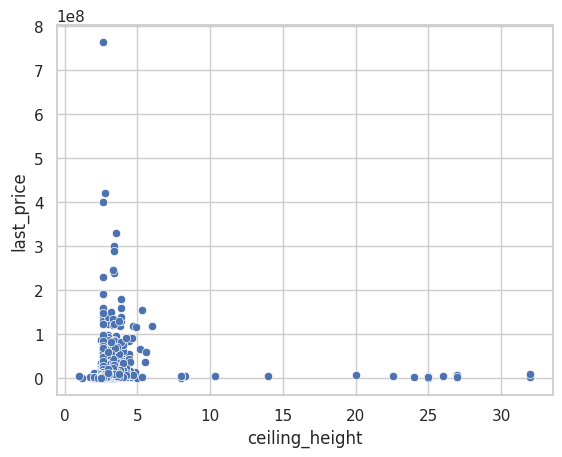

In [84]:
# посмотрим на распределение параметра - высота потолков по отношению к цене недвижимости.
display(data.ceiling_height.value_counts(bins=20,sort=False))
print (data.ceiling_height.describe())
sns.set_style("whitegrid")
sns.scatterplot(data=data[['last_price', 'ceiling_height']],  y="last_price", x="ceiling_height")
plt. show ()

In [85]:
# Ориентируясь по графику выше можно судить о том,
# что основная масса  объектов недвижимости выставленных на продажу с потолком в пределах 5.5-2,4 метров.
# посмотрим на количество объектов недвижимости с потолками выше 5.5 метров, но ниже 24 метров,ниже 2.4 метров и выше 24 метров.
display(data. query('24>ceiling_height>5.5').sort_values('ceiling_height'))
print (data. query('2.4>ceiling_height').sort_values('ceiling_height'))
print (data.query('ceiling_height>=24').sort_values('ceiling_height'))
print ('Количество квартир с потолком выше 5.5 метров, но ниже 24 метров:',(data. query('24>ceiling_height>5.5')). shape [0])
print ('Количество квартир с потолком ниже 2.4 метра:',(data. query('2.4>ceiling_height')). shape [0])
print ('Количество квартир с потолком выше 24 метра:',(data. query('ceiling_height>=24')). shape [0])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,new_local_name
1388,20,59800000,399.00,2015-01-21,5,5.60,6,227.90,6,False,False,False,69.85,0,"26,204.00","6,934.00",2.00,149.00,2.00,577.00,719.00,Санкт-Петербург
20264,17,119000000,187.60,2017-07-10,4,6.00,7,147.00,7,False,False,False,15.60,0,"26,902.00","5,605.00",3.00,484.00,1.00,305.00,259.00,Санкт-Петербург
3474,3,1400000,30.00,2018-03-16,1,8.00,5,15.30,2,False,False,False,7.30,0,NaN,NaN,0.00,NaN,0.00,NaN,125.00,Нурма
15743,14,5600000,67.00,2016-11-11,3,8.00,16,41.00,1,False,False,False,8.00,0,"32,691.00","11,035.00",1.00,723.00,0.00,NaN,474.00,Санкт-Петербург
17442,0,5350000,54.00,2015-06-16,2,8.00,5,29.00,2,False,False,False,9.45,1,"24,638.00","28,062.00",0.00,NaN,0.00,NaN,469.00,Красное Село
5863,20,5650000,45.00,2018-08-15,1,8.30,16,19.30,14,False,False,False,8.30,1,"13,069.00","10,763.00",0.00,NaN,1.00,613.00,14.00,Санкт-Петербург
22309,20,5300000,45.00,2017-09-30,1,10.30,16,15.50,15,False,False,False,7.88,0,"36,353.00","11,936.00",2.00,440.00,2.00,450.00,136.00,Санкт-Петербург
15061,19,5600000,56.40,2018-05-11,2,14.00,14,32.40,5,False,False,False,9.10,2,"14,814.00","13,610.00",0.00,NaN,0.00,NaN,315.00,Санкт-Петербург
17496,15,6700000,92.90,2019-02-19,3,20.00,17,53.20,14,False,False,False,12.00,5,"16,295.00","15,092.00",1.00,967.00,0.00,NaN,NaN,Санкт-Петербург
20507,12,5950000,60.00,2018-02-19,2,22.60,14,35.00,11,False,False,False,13.00,1,"27,028.00","12,570.00",0.00,NaN,0.00,NaN,40.00,Санкт-Петербург


       total_images  last_price  total_area first_day_exposition  rooms  \
22590            16     6000000       55.00           2018-10-31      2   
5712              5     1500000       42.80           2017-08-14      2   
16934             5     4100000       40.00           2017-10-17      1   
16446             6    12300000       88.30           2019-03-12      3   
552              11     2999000       33.50           2017-03-30      1   
2572              4     2400000       62.00           2018-12-27      3   
4212              1     2120000       35.43           2017-12-18      1   
20520             9     3600000       38.00           2018-07-05      1   
5850              9     1650000       35.50           2018-05-29      1   
11352             4     3300000       36.00           2017-06-18      1   
22960            17     2300000       53.60           2018-10-18      2   
16884             0     1500000       33.00           2018-10-03      1   
19329             5     1

In [86]:
# исправим значения высоты потолка превышающие 24 м.
data. loc[data.ceiling_height>=24, 'ceiling_height']=data. loc[data.ceiling_height>=24, 'ceiling_height']/10

In [87]:
# удалим строки со значениями высоты потолков ниже 2.4 м и выще 5.5 метров.
data=data.loc[(data.ceiling_height>=2.4)]
data=data.loc[(data.ceiling_height<=5.5)]
data.ceiling_height.describe()

count   23,260.00
mean         2.70
std          0.22
min          2.40
25%          2.60
50%          2.65
75%          2.70
max          5.50
Name: ceiling_height, dtype: float64

0.29083107071612546


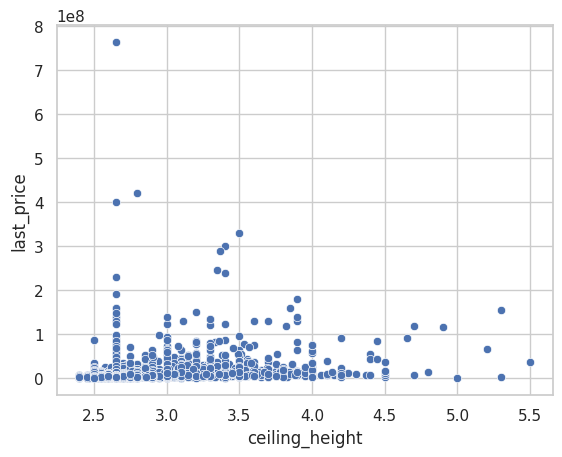

In [88]:
#  построим график, чтобы посмотреть, как теперь идёт распределение показателя высоты потолка.
sns.set_style("whitegrid")
sns.scatterplot(data=data[['last_price', 'ceiling_height']],  y="last_price", x="ceiling_height")
print(data['last_price'].corr(data['ceiling_height']))

######  Вывод
    Благодаря тщательному анализу распределения высоты потолков на графике, было решено удалить строки с высотой потолков ниже 2,4 метра и выше 5,5 метров. Исправить значения потолков выше 24 метров разделив на 10.Вероятнее всего это человеческий 'фактор' ошибки при внесении данных в базу. Таким образом было удалено 30 строк и скорректировано 17 строк. Теперь данные выглядят логично.


##### Исправление столбцов 'new_local_name','airports_nearest','parks_nearest', 'ponds_nearest', 'city_centers_nearest' на наличие аномалий.

In [89]:
# отфильтруем данные по столбцам airports_nearest, parks_nearest, ponds_nearest, city_centers_nearest.
data.loc[:,['new_local_name','airports_nearest','parks_nearest', 'ponds_nearest', 'city_centers_nearest']]. describe ()

,airports_nearest,parks_nearest,ponds_nearest,city_centers_nearest
count,"17,822.00","7,926.00","8,924.00","17,845.00"
mean,"28,800.56",490.63,518.51,"14,203.55"
std,"12,637.57",340.37,278.03,"8,614.20"
min,"6,450.00",1.00,13.00,181.00
25%,"18,551.00",288.00,293.00,"9,260.00"
50%,"26,763.50",455.00,503.00,"13,107.00"
75%,"37,268.00",612.00,731.25,"16,293.00"
max,"84,869.00","3,190.00","1,344.00","65,968.00"


In [90]:
# проверим, что при нулевых значениях ponds_around3000 и parks_around3000, значения ponds_nearest и parks_nearest больше 3 км, либо же отсутствуют.
print (data. loc[data.ponds_around3000==0, ['ponds_around3000', 'ponds_nearest']].describe())
display (data. loc[data.ponds_around3000==0, ['ponds_around3000', 'ponds_nearest']].sort_values ('ponds_nearest',ascending=False))
data. loc[data.parks_around3000==0, ['parks_around3000', 'parks_nearest']].sort_values ('parks_nearest',ascending=False)

       ponds_around3000  ponds_nearest
count         14,336.00           0.00
mean               0.00            NaN
std                0.00            NaN
min                0.00            NaN
25%                0.00            NaN
50%                0.00            NaN
75%                0.00            NaN
max                0.00            NaN


,ponds_around3000,ponds_nearest
1,0.00,NaN
5,0.00,NaN
6,0.00,NaN
7,0.00,NaN
8,0.00,NaN
...,...,...
23690,0.00,NaN
23692,0.00,NaN
23695,0.00,NaN
23696,0.00,NaN


,parks_around3000,parks_nearest
10959,0.00,"3,190.00"
19430,0.00,"3,190.00"
1590,0.00,"3,064.00"
19208,0.00,"3,013.00"
1,0.00,NaN
...,...,...
23691,0.00,NaN
23692,0.00,NaN
23695,0.00,NaN
23696,0.00,NaN


###### Вывод
    Рассматривая данные по расстоянию до центра, аэропорта, парка и пруда, аномалии не были найдены. Скорее всего они были устранены на прошлых шагах. Минимальное значение расстояние до парка в 1 метр решено оставить в данных, т. к. такие объекты недвижимости возможны. Проверена и подтверждена теория о том, что при нулевых значениях ponds_around3000 и parks_around3000, значения ponds_nearest и parks_nearest больше 3 км, либо же отсутствуют. Отсутствующие данные по расстоянию до центра,аэропорта, парка и пруда заполнить нет возможности по имеющимся данным, поэтому считаем, что целесообразно оставить так.


### Посчитайте и добавьте в таблицу новые столбцы

In [91]:
# Добавим столбец со стоимостью квадратного метра 'price_1m2' и приводим его в целочисленный тип
data['price_1m2'] = (data['last_price'] / data['total_area']).astype(int)

# Добавим столбцы дня недели, месяца и года
data['weekday'] = data['first_day_exposition'].dt.weekday.astype(int)
data['month'] = data['first_day_exposition'].dt.month.astype(int)
data['year'] = data['first_day_exposition'].dt.year.astype(int)

# Добавим столбец с отношением жилой площади к общей (area_ratio), переводим в % и приводим его в целочисленный тип
data['area_ratio'] = data['living_area'] / data['total_area'] * 100
#data['area_ratio'] = data['area_ratio'].fillna(value=0).astype(int)

# Добавим столбец с отношением площади кухни к общей (kitchen_ratio), переводим в % и приводим его в целочисленный тип
data['kitchen_ratio'] = data['kitchen_area'] / data['total_area'] * 100
#data['kitchen_ratio'] = data['kitchen_ratio'].fillna(value=0).astype(int)

# Создаём функцию для нового столбца с категориями этажа.
def floor_category(row) :
    if row['floor']==1:
        return 'первый'
    elif row['floor']==row['floors_total']:
        return 'последний'
    return 'другой'
data['floor_type'] = data.apply(floor_category, axis=1)

#Добавим столбец с расстоянием до центра города в километрах.
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000)
try:
    data['city_centers_nearest_km']=pd.array(data['city_centers_nearest_km'], dtype=pd.Int64Dtype())
    print ('city_centers_nearest_km is now in int64 format')
except:
    print ('We have a problem with city_centers_nearest_km')


# Устанавливаем маркер 9999 для пропусков в сроке продажи и приводим к целочисленному типу.
data['days_exposition'].fillna(9999, inplace=True)
data['days_exposition'] = data['days_exposition'].astype(int)

city_centers_nearest_km is now in int64 format


######  Вывод
    В данном разделе были созданы такие показатели, как:
    -стоимость квадратного метра;
    -доля жилой площади в общей в %;
    -доля площади кухни в общей в %;
    -категория этажа;
    -расстояние до центра города в километрах;
    -выделены столбцы с днями, неделями и годами.
    Установлен маркер 9999 для отсутствующих данных по количеству дней продажи недвижимости.

### Проведите исследовательский анализ данных

#### Изучение основных параметров

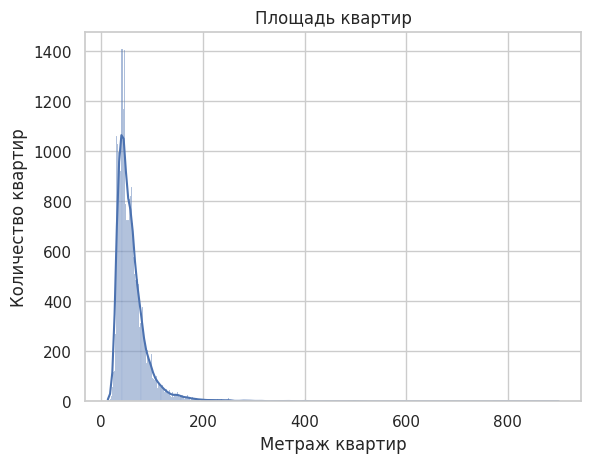

Наибольшие по площади варианты:
19540   900.00
12859   631.20
3117    631.00
15651   618.00
5358    590.00
4237    517.00
8018    507.00
5893    500.00
15016   500.00
12401   495.00
Name: total_area, dtype: float64
Частота распределения площади квартир на 30 корзин


(12.112, 42.567]       7180
(42.567, 72.133]      10930
(72.133, 101.7]        3444
(101.7, 131.267]        921
(131.267, 160.833]      365
(160.833, 190.4]        177
(190.4, 219.967]         72
(219.967, 249.533]       60
(249.533, 279.1]         32
(279.1, 308.667]         26
(308.667, 338.233]       11
(338.233, 367.8]         10
(367.8, 397.367]          6
(397.367, 426.933]        8
(426.933, 456.5]          2
(456.5, 486.067]          3
(486.067, 515.633]        7
(515.633, 545.2]          1
(545.2, 574.767]          0
(574.767, 604.333]        1
(604.333, 633.9]          3
(633.9, 663.467]          0
(663.467, 693.033]        0
(693.033, 722.6]          0
(722.6, 752.167]          0
(752.167, 781.733]        0
(781.733, 811.3]          0
(811.3, 840.867]          0
(840.867, 870.433]        0
(870.433, 900.0]          1
Name: total_area, dtype: int64

In [92]:
# Проведем анализ площади квартир.

sns.histplot(data=data['total_area'], x=data.total_area, kde=True)
plt.title('Площадь квартир')
plt.xlabel('Метраж квартир')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по площади варианты:')
print(data['total_area'].sort_values(ascending=False).head(10))
print ('Частота распределения площади квартир на 30 корзин')
data.total_area.value_counts(bins=30, sort=False)

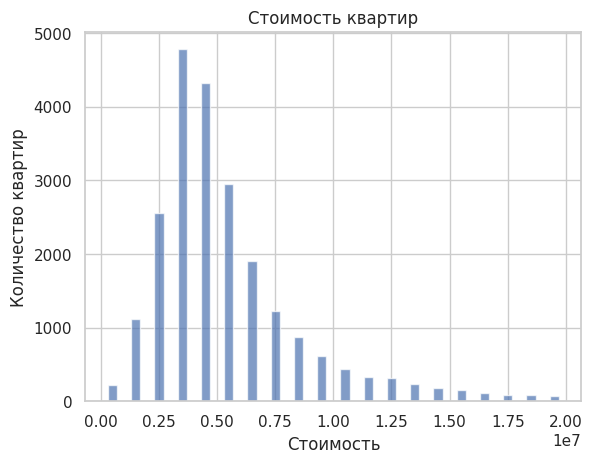

Наибольшие по цене варианты:
12971    763000000
19540    420000000
14706    401300000
1436     330000000
15651    300000000
22831    289238400
16461    245000000
13749    240000000
5893     230000000
8900     190870000
Name: last_price, dtype: int64


In [93]:
# Проведем анализ стоимости квартир.
plt.hist(data['last_price'],alpha=0.7, rwidth = 0.4,bins=20, range=(0,20000000))
plt.title('Стоимость квартир')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по цене варианты:')
print(data['last_price'].sort_values(ascending=False).head(10))

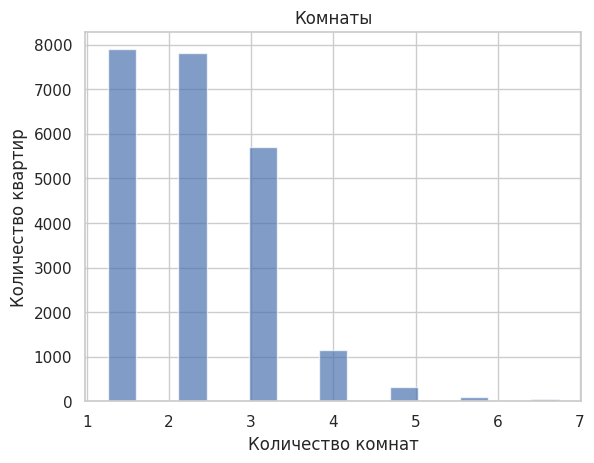

Наибольшие по числу комнат объекты недвижимости:
14498    19
18848    16
5358     15
20829    14
866      14
19540    12
648      11
9688     11
18891    10
4149     10
Name: rooms, dtype: int64


In [94]:
# Проведем анализ количества комнат.
plt.hist(data['rooms'],alpha=0.7,rwidth = 0.4,bins=7, range=(1,7))
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по числу комнат объекты недвижимости:')
print(data['rooms'].sort_values(ascending=False).head(10))

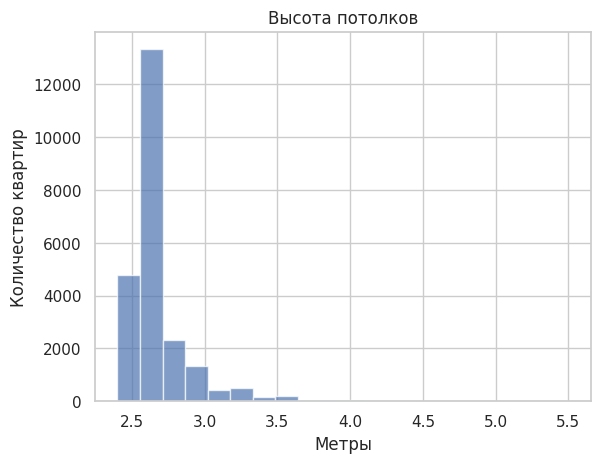

Наибольшие по высоте потолков варианты:
7578    5.50
12628   5.30
1026    5.30
464     5.20
1053    5.00
21923   4.90
2802    4.80
19142   4.70
1300    4.70
12401   4.65
Name: ceiling_height, dtype: float64


(2.396, 2.607]     6733
(2.607, 2.813]    13546
(2.813, 3.02]      1519
(3.02, 3.227]       695
(3.227, 3.433]      353
(3.433, 3.64]       232
(3.64, 3.847]        75
(3.847, 4.053]       65
(4.053, 4.26]        19
(4.26, 4.467]         7
(4.467, 4.673]        7
(4.673, 4.88]         3
(4.88, 5.087]         2
(5.087, 5.293]        1
(5.293, 5.5]          3
Name: ceiling_height, dtype: int64

In [95]:
# Проведем анализ высоты потолков.
plt.hist(data['ceiling_height'],alpha=0.7, bins=20)
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по высоте потолков варианты:')
print(data['ceiling_height'].sort_values(ascending=False).head(10))
data.ceiling_height.value_counts(bins=15, sort=False)

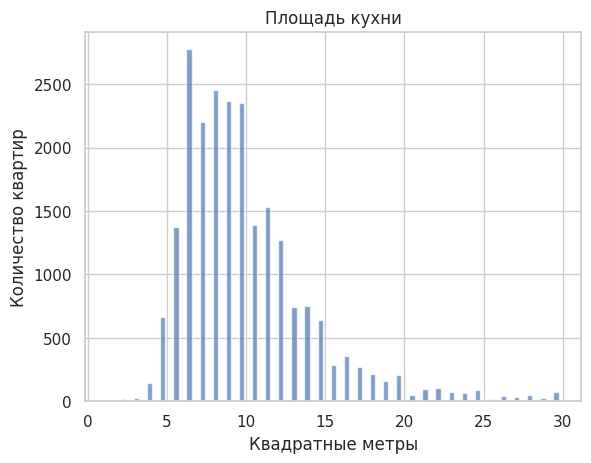

Наибольшие по площади кухни варианты:
19540   112.00
20215   107.00
2489    100.70
5358    100.00
16239    93.20
16797    93.00
15016    87.54
10867    87.20
9826     86.50
4394     77.00
Name: kitchen_area, dtype: float64


(1.1880000000000002, 8.68]    10254
(8.68, 16.06]                 10910
(16.06, 23.44]                 1354
(23.44, 30.82]                  407
(30.82, 38.2]                   153
(38.2, 45.58]                    97
(45.58, 52.96]                   33
(52.96, 60.34]                   19
(60.34, 67.72]                   15
(67.72, 75.1]                     7
(75.1, 82.48]                     2
(82.48, 89.86]                    3
(89.86, 97.24]                    2
(97.24, 104.62]                   2
(104.62, 112.0]                   2
Name: kitchen_area, dtype: int64

In [96]:
# Проведём анализ площади кухни.
plt.hist(data['kitchen_area'],alpha=0.7,rwidth = 0.4,bins=35, range=(1,30))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по площади кухни варианты:')
print(data['kitchen_area'].sort_values(ascending=False).head(10))
data.kitchen_area.value_counts(bins=15, sort=False)

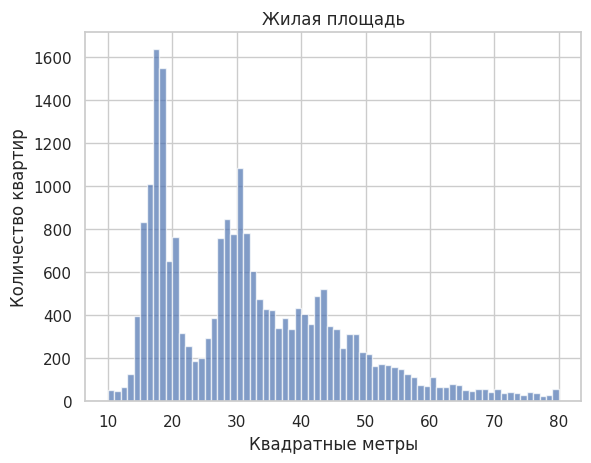

Наибольшие по жилой площади варианты:
19540   409.70
5358    409.00
3117    360.41
12401   347.50
4237    332.00
12859   322.30
660     312.50
8018    301.50
14088   300.00
15016   285.59
Name: living_area, dtype: float64
(5.595, 32.913]       13650
(32.913, 59.827]       7804
(59.827, 86.74]        1205
(86.74, 113.653]        334
(113.653, 140.567]      104
(140.567, 167.48]        80
(167.48, 194.393]        38
(194.393, 221.307]       13
(221.307, 248.22]         6
(248.22, 275.133]        13
(275.133, 302.047]        6
(302.047, 328.96]         2
(328.96, 355.873]         2
(355.873, 382.787]        1
(382.787, 409.7]          2
Name: living_area, dtype: int64


living_area
6.00      1
6.50      1
7.43      2
7.54      1
8.00      2
         ..
332.00    1
347.50    1
360.41    1
409.00    1
409.70    1
Name: rooms, Length: 2379, dtype: int64

In [97]:
# Проведём анализ жилой площади.
plt.hist(data['living_area'], bins=70,alpha=0.7, range=(10,80))
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по жилой площади варианты:')
print(data['living_area'].sort_values(ascending=False).head(10))
print (data.living_area.value_counts(bins=15, sort=False))
data.groupby('living_area') ['rooms'].count()

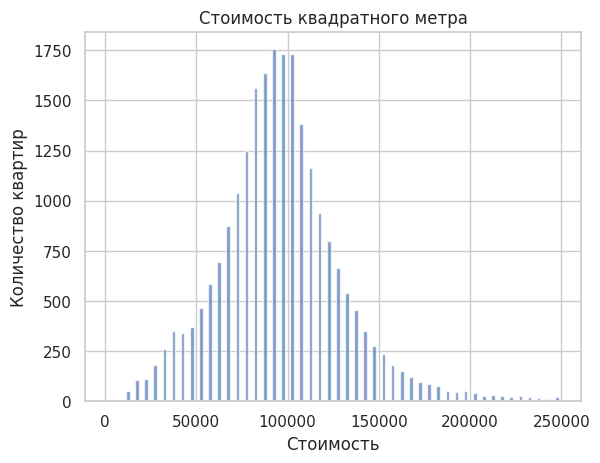

Наибольшие по цене за квадрат варианты:
12971    1907500
1436     1736842
22831    1542604
14706    1000748
4996      995983
16461     857542
4859      848484
17172     848484
16647     841379
17912     813253
Name: price_1m2, dtype: int64


(6062.461, 134597.867]        20540
(134597.867, 261233.733]       2481
(261233.733, 387869.6]          159
(387869.6, 514505.467]           49
(514505.467, 641141.333]         16
(641141.333, 767777.2]            5
(767777.2, 894413.067]            5
(894413.067, 1021048.933]         2
(1021048.933, 1147684.8]          0
(1147684.8, 1274320.667]          0
(1274320.667, 1400956.533]        0
(1400956.533, 1527592.4]          0
(1527592.4, 1654228.267]          1
(1654228.267, 1780864.133]        1
(1780864.133, 1907500.0]          1
Name: price_1m2, dtype: int64

In [98]:
# Проанализируем стоимость квадратного метра.
plt.hist(data['price_1m2'], rwidth= 0.4,bins=50,alpha=0.7, range=(0,250000))
plt.title('Стоимость квадратного метра')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по цене за квадрат варианты:')
print(data['price_1m2'].sort_values(ascending=False).head(10))
data.price_1m2.value_counts(bins=15, sort=False)

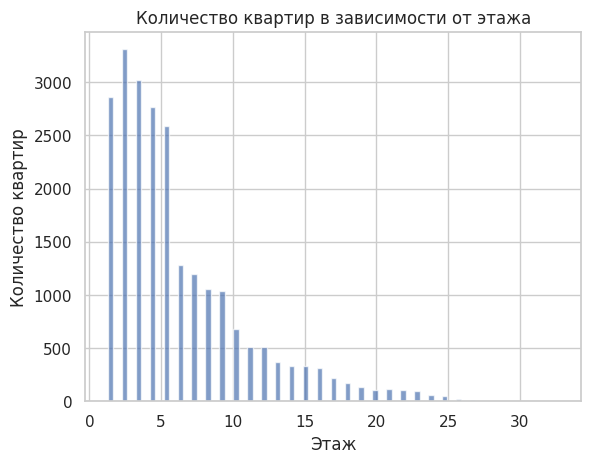

Самые высокие по этажу предложения:
18218    33
11575    32
18629    31
1917     30
11079    29
397      28
8496     27
4091     27
6157     27
113      27
Name: floor, dtype: int64


(0.967, 3.133]      9188
(3.133, 5.267]      5357
(5.267, 7.4]        2476
(7.4, 9.533]        2096
(9.533, 11.667]     1190
(11.667, 13.8]       877
(13.8, 15.933]       665
(15.933, 18.067]     700
(18.067, 20.2]       244
(20.2, 22.333]       225
(22.333, 24.467]     158
(24.467, 26.6]        68
(26.6, 28.733]        11
(28.733, 30.867]       2
(30.867, 33.0]         3
Name: floor, dtype: int64

In [99]:
# Проанализируем количество предложений при разных этажах квартиры.
plt.hist(data['floor'],rwidth=.4,bins=data['floor'].max(),alpha=0.7)
plt.title('Количество квартир в зависимости от этажа')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show()
print('Самые высокие по этажу предложения:')
print(data['floor'].sort_values(ascending=False).head(10))
data.floor.value_counts(bins=15, sort=False)

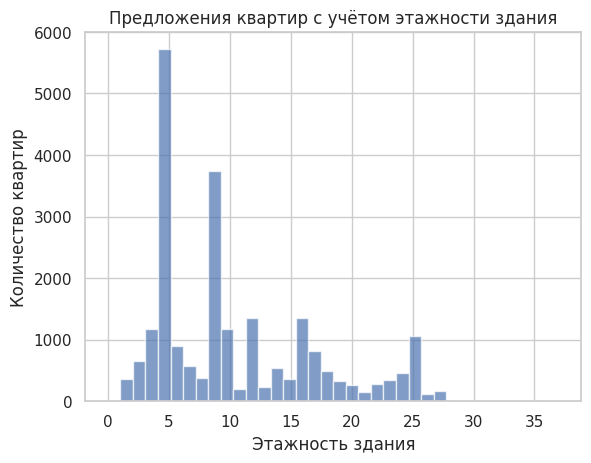

Количество предложений квартир с учётом количества этажей в здании:
11079    36
5807     36
397      36
7236     35
22946    35
8496     35
871      35
18629    35
5808     35
18218    35
Name: floors_total, dtype: int64
(0.964, 3.333]      1039
(3.333, 5.667]      6893
(5.667, 8.0]        1852
(8.0, 10.333]       4903
(10.333, 12.667]    1551
(12.667, 15.0]      1131
(15.0, 17.333]      2173
(17.333, 19.667]     820
(19.667, 22.0]       706
(22.0, 24.333]       800
(24.333, 26.667]    1181
(26.667, 29.0]       183
(29.0, 31.333]         0
(31.333, 33.667]       1
(33.667, 36.0]        27
Name: floors_total, dtype: int64


In [100]:
# Проанализируем количество предложений при разной этажности  здания.
plt.hist(data['floors_total'], bins=data['floors_total'].max(),range=(0,37),alpha=0.7)
plt.title('Предложения квартир с учётом этажности здания')
plt.xlabel('Этажность здания')
plt.ylabel('Количество квартир')
plt.show()
print('Количество предложений квартир с учётом количества этажей в здании:')
print(data['floors_total'].sort_values(ascending=False).head(10))
print (data.floors_total.value_counts(bins=15, sort=False))

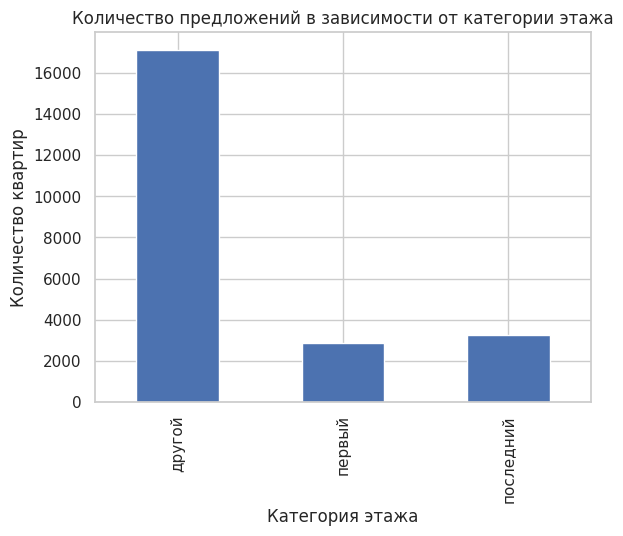

In [101]:
# Проанализируем количество предложений при разных категориях этажей квартиры.
data.groupby(by='floor_type')['floor_type'].count().plot(kind='bar', ylabel = 'count')
plt.title('Количество предложений в зависимости от категории этажа')
plt.xlabel('Категория этажа')
plt.ylabel('Количество квартир')
plt.show()

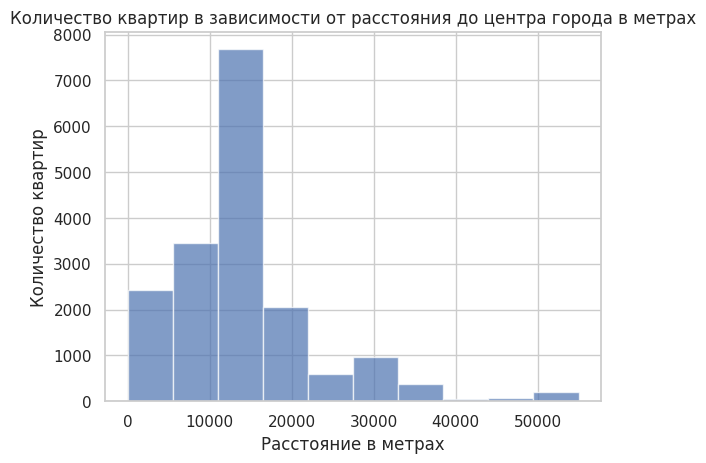

Самые удалённые квартиры до центра города:
9640    65,968.00
5340    65,952.00
577     65,764.00
20746   65,105.00
5218    64,857.00
18884   62,706.00
2974    62,454.00
16569   61,495.00
23123   60,223.00
4441    59,626.00
Name: city_centers_nearest, dtype: float64
(0.964, 3.333]      1039
(3.333, 5.667]      6893
(5.667, 8.0]        1852
(8.0, 10.333]       4903
(10.333, 12.667]    1551
(12.667, 15.0]      1131
(15.0, 17.333]      2173
(17.333, 19.667]     820
(19.667, 22.0]       706
(22.0, 24.333]       800
(24.333, 26.667]    1181
(26.667, 29.0]       183
(29.0, 31.333]         0
(31.333, 33.667]       1
(33.667, 36.0]        27
Name: floors_total, dtype: int64


In [102]:
# Проанализируем количество предложений при разном расстоянии до центра города в метрах.
plt.hist(data['city_centers_nearest'],alpha=0.7,range=(0,55000))
plt.title('Количество квартир в зависимости от расстояния до центра города в метрах')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество квартир')
plt.show()
print('Самые удалённые квартиры до центра города:')
print(data['city_centers_nearest'].sort_values(ascending=False).head(10))
print (data.floors_total.value_counts(bins=15, sort=False))

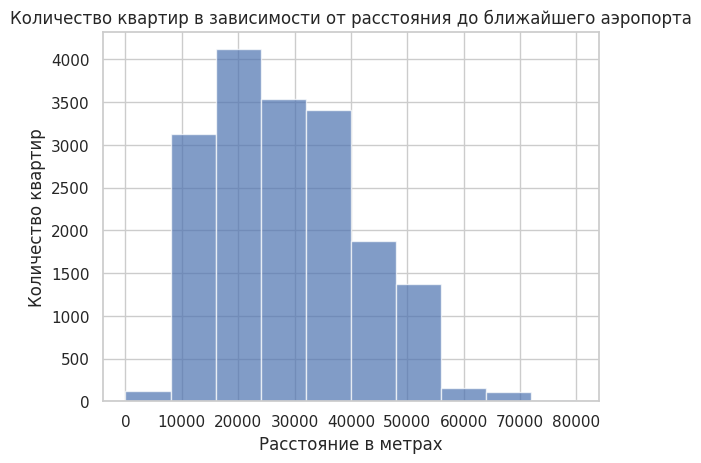

Наибольшие по удалённости квартиры до ближайшего аэропорта:
9640    84,869.00
5340    84,853.00
577     84,665.00
20746   84,006.00
5218    83,758.00
18884   81,607.00
2974    81,355.00
4441    78,527.00
939     75,646.00
376     73,827.00
Name: airports_nearest, dtype: float64
(6371.58, 11677.933]       938
(11677.933, 16905.867]    2672
(16905.867, 22133.8]      2786
(22133.8, 27361.733]      2836
(27361.733, 32589.667]    1902
(32589.667, 37817.6]      2498
(37817.6, 43045.533]      1407
(43045.533, 48273.467]    1192
(48273.467, 53501.4]      1095
(53501.4, 58729.333]       319
(58729.333, 63957.267]      53
(63957.267, 69185.2]        80
(69185.2, 74413.133]        35
(74413.133, 79641.067]       2
(79641.067, 84869.0]         7
Name: airports_nearest, dtype: int64


In [103]:
# Проанализируем количество предложений при разном расстоянии до ближайшего аэропорта.
plt.hist(data['airports_nearest'],alpha=0.7,range=(0,80000))
plt.title('Количество квартир в зависимости от расстояния до ближайшего аэропорта')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по удалённости квартиры до ближайшего аэропорта:')
print(data['airports_nearest'].sort_values(ascending=False).head(10))
print (data.airports_nearest.value_counts(bins=15, sort=False))

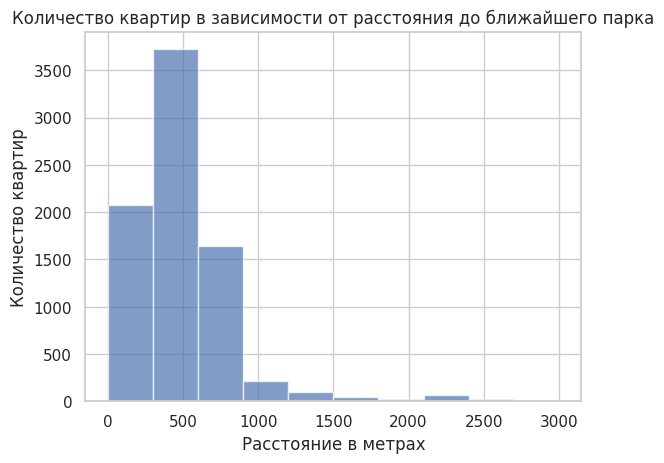

Наибольшие по удалённости квартиры до ближайшего парка:
10959   3,190.00
19430   3,190.00
1590    3,064.00
19208   3,013.00
23080   2,984.00
2659    2,905.00
1860    2,888.00
7855    2,880.00
3865    2,847.00
22003   2,768.00
Name: parks_nearest, dtype: float64
(-2.19, 213.6]      1303
(213.6, 426.2]      2279
(426.2, 638.8]      2655
(638.8, 851.4]      1144
(851.4, 1064.0]      223
(1064.0, 1276.6]     104
(1276.6, 1489.2]      48
(1489.2, 1701.8]      28
(1701.8, 1914.4]      26
(1914.4, 2127.0]      41
(2127.0, 2339.6]      41
(2339.6, 2552.2]      19
(2552.2, 2764.8]       5
(2764.8, 2977.4]       5
(2977.4, 3190.0]       5
Name: parks_nearest, dtype: int64


In [104]:
# Проанализируем стоимость при разном расстоянии до ближайшего парка.
plt.hist(data['parks_nearest'],alpha=0.7,range=(0,3000))
plt.title('Количество квартир в зависимости от расстояния до ближайшего парка')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по удалённости квартиры до ближайшего парка:')
print(data['parks_nearest'].sort_values(ascending=False).head(10))
print (data.parks_nearest.value_counts(bins=15, sort=False))

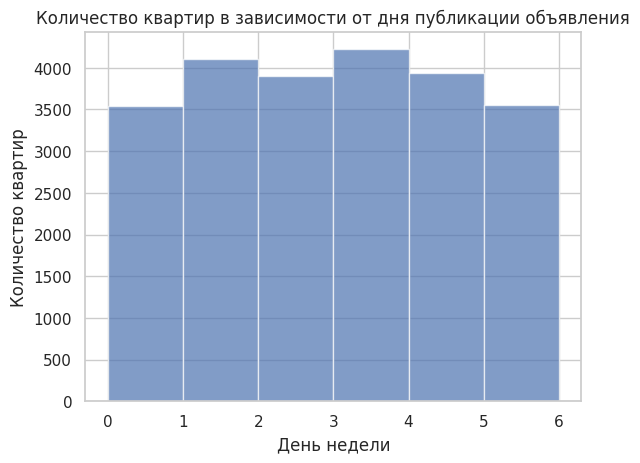

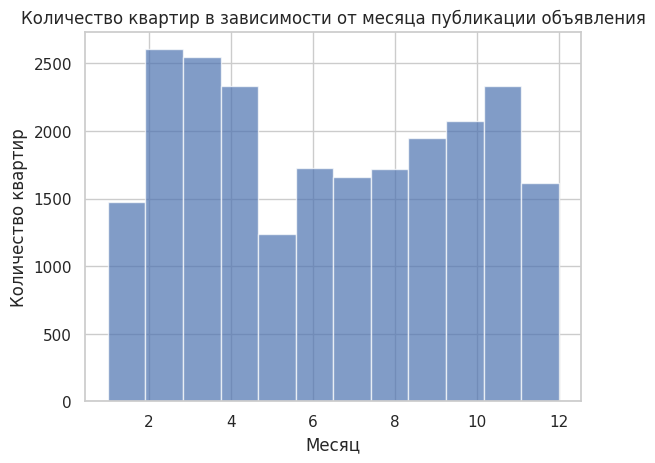

In [105]:
# Проанализируем день и месяц публикации объявления.
plt.hist(data['weekday'],alpha=0.7,bins=data.weekday.max())
plt.title('Количество квартир в зависимости от дня публикации объявления')
plt.xlabel('День недели')
plt.ylabel('Количество квартир')
plt.show()


plt.hist(data['month'],alpha=0.7,bins=data.month.max())
plt.title('Количество квартир в зависимости от месяца публикации объявления')
plt.xlabel('Месяц')
plt.ylabel('Количество квартир')
plt.show()

##### Вывод

    Площадь квартир:
    Наибольшее количество предложений находится на уровне 20-100 квадратных метров, но есть и эксклюзивные варианты с площадью более 200 квадратных метров. Пик предложений находится на уровне 40 кв.м.

    Стоимость квартир:
    Очень много предложений со стоимостью квартир в пределах 2,5-5 млн. Также в датафрейме присутствуют варианты стоимостью более 20 млн.,но они редки и их можно отнести к объектам роскоши.

    Количество комнат:
    В выборке предложений основную долю занимают 1-комнатные и 2х-комнатные квартиры, далее по количеству предложений идут 3х-комнатные квартиры. Есть небольшая доля 4,5 и 6 комнатных квартир. Варианты больше 7 комнат выглядят странно.

    Высота потолков:
    Большинство вариантов имеют высоту потолков от 2,5 до 3 метров. Однако есть и варианты с потолком выше 3х метров.

    Площадь кухни:
    Самые распространённые кухни - от 5 до 15 метров. Больше 20 метров кухни практически не встречаются. Больше 30 - единичные случаи.

    Жилая площадь:
    Самые распространённые варианты с жилой площадью от 10 до 50 метров. После 80 метров встречаются единичные случаи. Два пика графика вызваны, вероятно, тем, что это жилые площади для 1-комнатной, затем для 2-комнатной и после этого для 3-комнатной квартиры.

    Стоимость квадратного метра:
    Имеет нормальное распределение с пиком в районе 100_000. Варианты дороже 250_000 являются единичными.
    
    Количество предложений с учетом этажа квартиры.
    Основная масса предложений находится с 1 по 15 этаж.Наибольнее количество предложений находится на 2 и 3 этажах, далее идет 1 этаж и с небольшим отрывом от него 4 и 5 этажи. В Санкт-Петербурге много пятиэтажных зданий.
    
    Количество предложений с учетом этажности  здания.
    Основная масса предложений с учетом общего количества этажей находится с 4 по 25 этажей. Пиковые значения находятся на уровне 5-ти этажек,далее уже меньшее количество это 9-ти этажные здания и уже меньшие значения это 12 и 16 этажные здания.
    
    Количество предложений с учетом категории этажа квартиры.
    Наибольнее количество предложений по категории этажа -другой. Первый этаж и  последний примерно одинаковое количество предложений
    
    Количество предложений с учетом расстояния до центра города в метрах.
    Разброс расстояния до центра города находится от 0 до 36000 м. Наибольшее количество предложений находится в 10_000-15_000 м. до центра.
    
    Количество предложений с учетом расстояния до ближайшего аэропорта.
    Основная масса предложений находится на расстоянии от 9 до 53000 м. до ближайшего аэропорта.Предложений в непосредственной близости к аэропорту мало.
    
    Количество предложений с учетом расстояния до ближайшего парка.
    В основном все  предложенные квартиры находятся на расстоянии 300-600 метров до ближайшего парка.
    
    Количество предложений с учетом дня и месяца публикации объявления.
    Основное количество объявлений опубликовано во вторник или четверг. Провал в публикации объявлений в субботу и воскресенье, что логично.По месяцам: всплеск публикаций в февраль-апрель -самый большой и поменьше-октябрь-ноябрь. Самый 'тихий' месяц по количеству объявлений-это май.
    


#### Изучение времени продажи квартиры

Время продажи (медиана): 95 

Время продажи (среднее): 181 



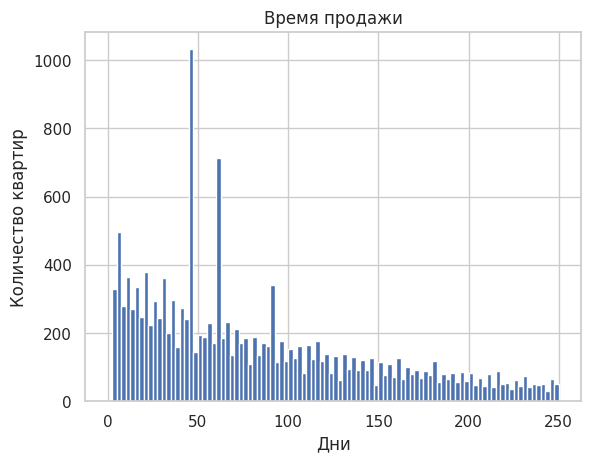

count   20,128.00
mean       181.10
std        220.10
min          1.00
25%         45.00
50%         95.00
75%        232.00
max      1,580.00
Name: days_exposition, dtype: float64

45      867
60      532
7       227
30      207
90      197
       ... 
1434      1
1231      1
739       1
744       1
971       1
Name: days_exposition, Length: 1138, dtype: int64

In [106]:
# Отбрасываем маркеры пустых значений
print('Время продажи (медиана):', round(data.query('days_exposition != 9999')['days_exposition'].median()),'\n')
print('Время продажи (среднее):', round(data.query('days_exposition != 9999')['days_exposition'].mean()),'\n')
# Гистограма времени продажи
plt.hist(data.query('days_exposition != 9999')['days_exposition'], bins=100, range=(0,250))
plt.title('Время продажи')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.show()
# Изучаем значения срока продажи
display(data.query('days_exposition != 9999')['days_exposition'].describe())
data.query('days_exposition != 9999')['days_exposition'].value_counts()

##### Вывод

    Медианное время продажи - 96 дней. Среднее время продажи - 182 день.В основном квартиры продаются за срок в 45 дней. Есть большое число квартир, проданных всего за несколько дней после публикации. А также есть варианты, которые продавались несколько десятков месяцев. Быстрой продажей можно назвать срок в 45 дней и меньше. Долгой продажей - 230 дней (7,5 месяцев) и дольше.

#### Работа с редкими и выбивающимися значениями

In [107]:
# Функция для подсчёта границ с учетом 1.5 размаха
def quartile_range(df, column):
    """функция исключает данные, которые более чем 1,5  раз превышают межквартильный диапазон от медианы. """
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    dfq = df.loc[(df[column] < q3 + 1.5*iqr) & (df[column] > q1 - 1.5*iqr), column]
    return dfq
# Столбцы с выбросами
list_features = ['last_price', 'total_area', 'kitchen_area', 'living_area', 'days_exposition', 'ceiling_height', 'rooms']
for col in list_features:
    data[col] = quartile_range(data, col)

# Возвращаем в целочисленный тип число комнат
data['rooms'] = data['rooms'].fillna(0).astype(int)

# Изучаем, есть ли выбивающиеся значения
data.describe()
data. info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23260 entries, 0 to 23698
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             23260 non-null  int64         
 1   last_price               21236 non-null  float64       
 2   total_area               22037 non-null  float64       
 3   first_day_exposition     23260 non-null  datetime64[ns]
 4   rooms                    23260 non-null  int64         
 5   ceiling_height           20393 non-null  float64       
 6   floors_total             23260 non-null  int64         
 7   living_area              22392 non-null  float64       
 8   floor                    23260 non-null  int64         
 9   is_apartment             23260 non-null  bool          
 10  studio                   23260 non-null  bool          
 11  open_plan                23260 non-null  bool          
 12  kitchen_area             21996 n

##### Вывод
В датафрейме отброшены значения на основе 1.5 размаха. Значения стали лучше и адекватнее.

#### Определение факторов, влияющих на стоимость квартиры

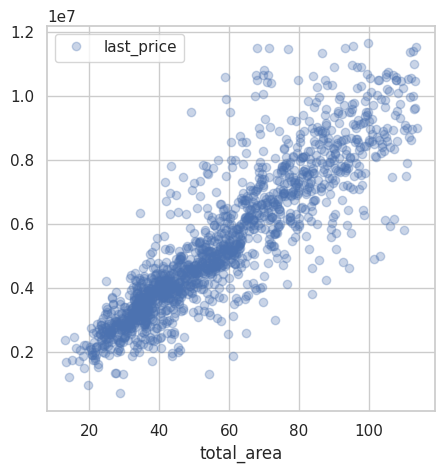

Корреляция цены и площади: 

            last_price  total_area
last_price        1.00        0.91
total_area        0.91        1.00 



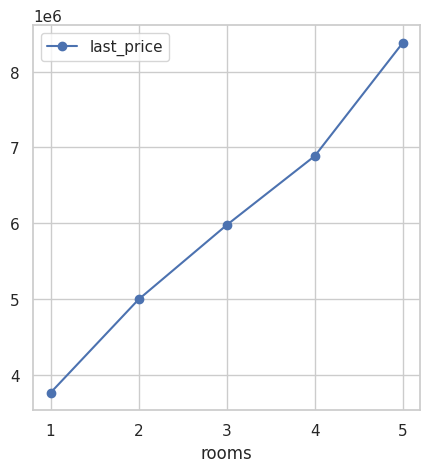

Корреляция цены и числа комнат: 

            last_price  rooms
last_price        1.00   0.54
rooms             0.54   1.00 



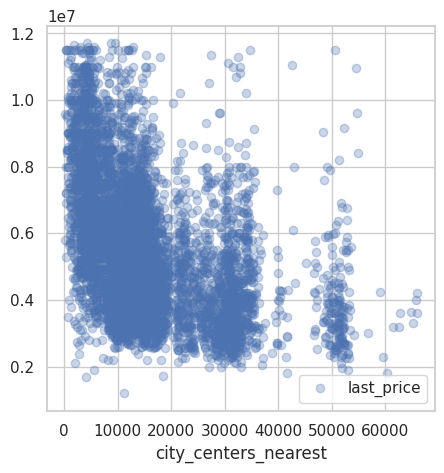

Корреляция цены и удалённости от центра: 

                      city_centers_nearest  last_price
city_centers_nearest                  1.00        0.70
last_price                            0.70        1.00 



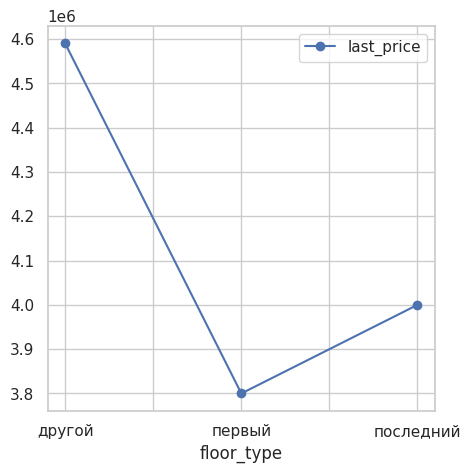

In [108]:
# Зависимость цены от площади
(data.pivot_table(index='total_area', values='last_price').plot(grid=True,alpha=0.3,style='o', figsize=(5, 5)))
plt.show()
print('Корреляция цены и площади:','\n')
print(data.pivot_table(index='floor', values=['total_area', 'last_price']).corr(),'\n')

# Зависимость цены от числа комнат
(data.query('rooms > 0').pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(5, 5)))
plt.show()
print('Корреляция цены и числа комнат:','\n')
print(data.query('rooms > 0').pivot_table(index='floor', values=['rooms', 'last_price']).corr(),'\n')

# Зависимость цены от удалённости от центра
(data.pivot_table(index='city_centers_nearest', values='last_price').plot(grid=True,alpha=0.3,style='o', figsize=(5, 5)))
plt.show()
print('Корреляция цены и удалённости от центра:','\n')
print(data.pivot_table(index='floor', values=['city_centers_nearest', 'last_price']).corr(),'\n')

# Зависимость цены от этажа
(data.pivot_table(index='floor_type', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(5, 5)))
plt.show()

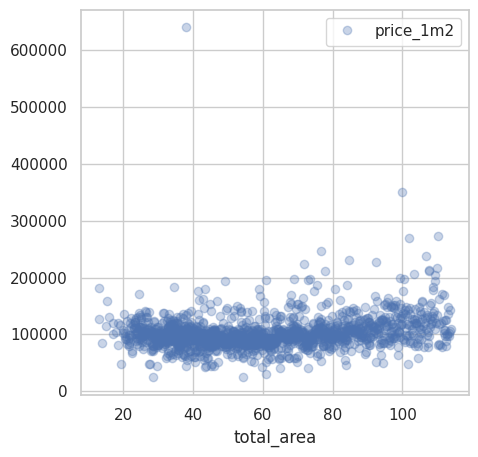

Корреляция цены за квадрат и площади: 

            price_1m2  total_area
price_1m2        1.00        0.06
total_area       0.06        1.00 



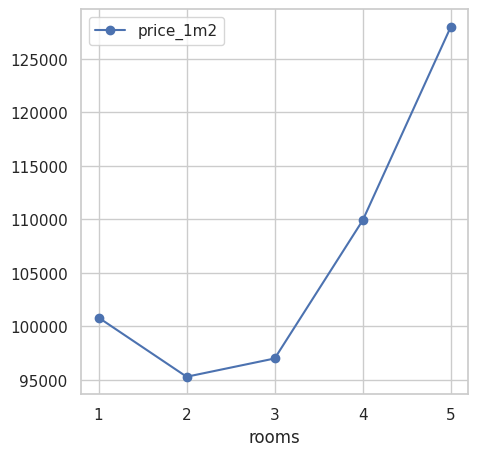

Корреляция цены за квадрат и числа комнат: 

           price_1m2  rooms
price_1m2       1.00  -0.27
rooms          -0.27   1.00 



In [109]:
# Зависимость цены за квадрат от площади
(data.pivot_table(index='total_area', values='price_1m2').plot(grid=True,alpha=0.3, style='o', figsize=(5, 5)))
plt.show()
print('Корреляция цены за квадрат и площади:','\n')
print(data.pivot_table(index='floor', values=['total_area', 'price_1m2']).corr(),'\n')

# Зависимость цены за квадрат от числа комнат
(data.query('rooms > 0').pivot_table(index='rooms', values='price_1m2').plot(grid=True, style='o-', figsize=(5, 5)))
plt.show()
print('Корреляция цены за квадрат и числа комнат:','\n')
print(data.query('rooms > 0').pivot_table(index='floor', values=['rooms', 'price_1m2']).corr(),'\n')

##### Вывод

    Чем больше площадь, тем выше стоимость. Корреляция этих параметров крайне высокая. Число комнат так же влияет на цену (больше комнат - больше цена), но зависимость ниже, чем у площади. Можно сделать два вывода: бывают квартиры с большими по площади комнатами; квартиры в центре состоят из малого числа комнат, но стоят достаточно высоко.

    Самые дорогостоящие варианты квартир находятся в центре города,но можно найти даже в центредостаточно дешёвые варианты.

    Первый этаж непосредственно влияет на стоимость квартиры - в среднем квартиры на 1-м этаже значительно дешевле. Чуть дороже последний этаж. Наибольшая стоимость у квартир, расположенных не на 1-м и не на последнем этаже.

    Корреляция цены за квадрат и числа комнат выше у квартир с 4 и 5 комнатами. Вероятно это можно объяснить элитностью недвижимости.

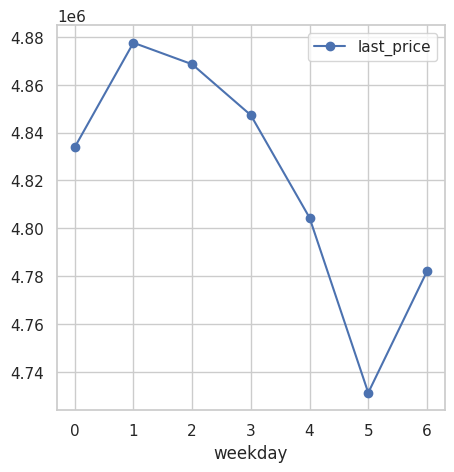

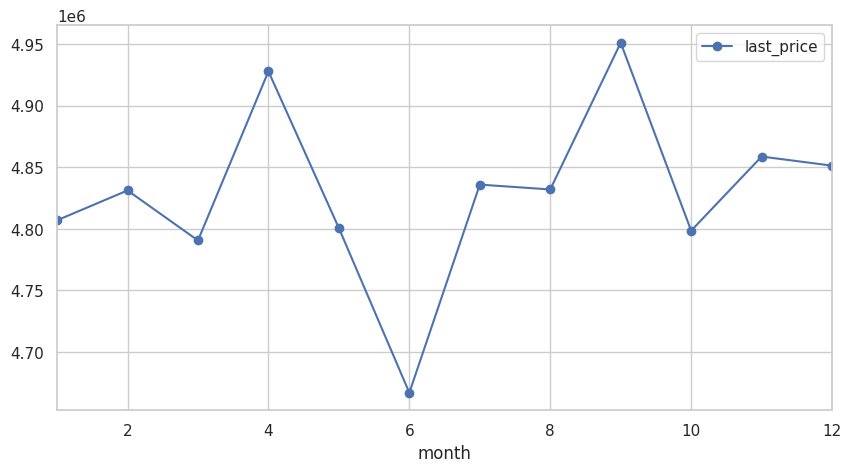

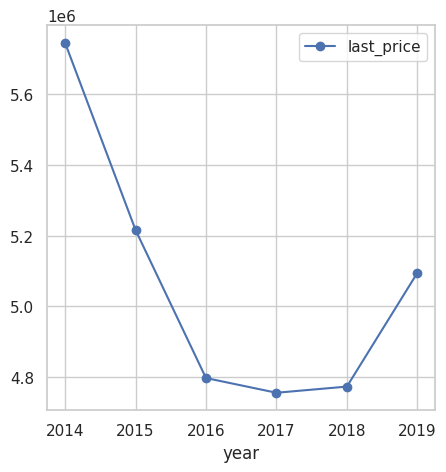

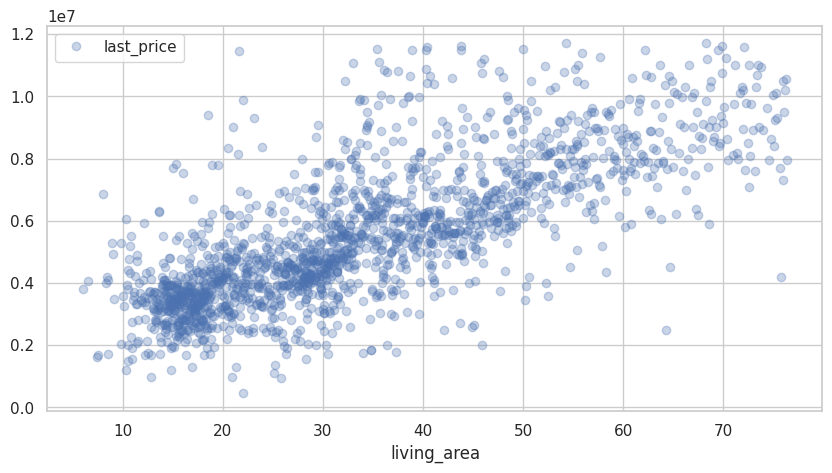

Корреляция цены и жилой площади: 

             last_price  living_area
last_price         1.00         0.73
living_area        0.73         1.00 



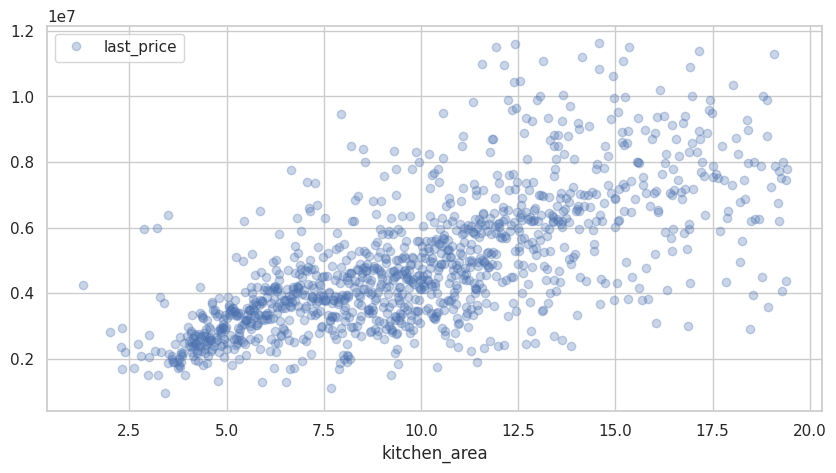

Корреляция цены и площади кухни: 

              kitchen_area  last_price
kitchen_area          1.00        0.45
last_price            0.45        1.00 



In [110]:
# Зависимость от дня размещения
(data.pivot_table(index='weekday', values='last_price').plot(grid=True, style='o-', figsize=(5, 5)))
plt.show()
# Зависимость от месяца размещения
(data.pivot_table(index='month', values='last_price').plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 5)))
plt.show()
# Зависимость от года размещения
(data.pivot_table(index='year', values='last_price').plot(grid=True, style='o-', figsize=(5, 5)))
plt.show()

#Зависимость от жилой площади.
(data.pivot_table(index='living_area', values='last_price').plot(grid=True,alpha=0.3,style='o', figsize=(10, 5)))
plt.show()
print('Корреляция цены и жилой площади:','\n')
print(data.pivot_table(index='floor', values=['living_area', 'last_price']).corr(),'\n')

#Зависимость от площади кухни.
(data.pivot_table(index='kitchen_area', values='last_price').plot(grid=True,alpha=0.3,style='o', figsize=(10, 5)))
plt.show()
print('Корреляция цены и площади кухни:','\n')
print(data.pivot_table(index='floor', values=['kitchen_area', 'last_price']).corr(),'\n')

##### Вывод
         Корреляция между жилой площадью и ценой объекта очень высокая. В то же время цена меньше зависит от площади кухни. Вероятно сказывается наличие таких объектов, где кухня совмещена с комнатой. Например, те же студии.

        Зависимость от дня, месяца и года День недели: -дороже всего квартиры, опубликованные во вторник, дешевле всего - в субботу. Месяц: -дороже всего квартиры, продающиеся с сентября, дешевле всего - с июня. Год: -квартиры очень сильно подешевели в 2016-2018 годах, что, вероятно, вызвано некоторым кризисом 2014-2015 годов. В 2019 году цены снова стали повышаться, т.к. экономика и зарплаты пошли на подъём.

### Определение стоимости квадратного метра в топ-10 городов по числу объявлений.

In [111]:
# Сравним среднюю стоимость квадратного метра в топ-10 городов по числу объявлений.
city_ten_top = data['new_local_name'].value_counts().head(10)
city_price_1m2 = data.query('new_local_name in (@city_ten_top.index)').pivot_table(values='price_1m2', index='new_local_name')
city_price_1m2 = city_price_1m2.astype(int)
city_price_1m2.sort_values('price_1m2', ascending=False)

,price_1m2
new_local_name,
Санкт-Петербург,114629
Пушкин,103267
Кудрово,95226
Парголово,90152
Мурино,85801
Шушары,78532
Колпино,75583
Гатчина,68815
Всеволожск,68648


##### Вывод
        Лидером по стоимости за квадратный метр, как и ожидалось, стал -Санкт-Петербург. За ним идёт Пушкин, что, вероятно, вызвано хорошей застройкой и большим количеством парков. Затем идут районы, фактически являющиеся Санкт-Петербургом и непосредственно к нему примыкают. Из топ-10 наименьшая стоимость в Гатчине и Всеволожске, из которых далеко ехать до Санкт-Петербурга, а также небольшой по численности населения Выборг, расположенный на большом расстоянии от Санкт-Петербурга.

### Граница центральной зоны

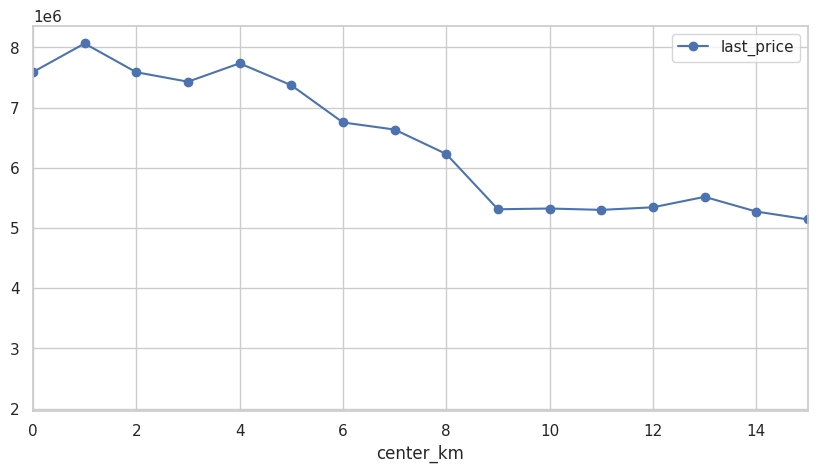

In [112]:
# Добавляем столбец с расстоянием до центра в км, округляем до целого
data['center_km'] = data['city_centers_nearest'] / 1000
data['center_km'] = data['center_km'].fillna(value=0).astype(int)
# Выбираем Санкт-Петербург, смотрим на график, где указана средняя стоимость для каждого км
(data.query('new_local_name == "Санкт-Петербург"').pivot_table(index='center_km', values='last_price').plot(grid=True, style='o-', xlim=(0,15), figsize=(10, 5)))
plt.show()

##### Вывод
    
    Центральная зона - это 7 км и меньше. Дальше 7 км средняя цена на квартиры резко снижается.

### Анализ сегмента в центре -удалила

### Общий вывод


    Срок продажи квартиры:

    Чаще всего квартиру продают за 96 дней. Если меньше 45 дней, то это быстро, если дольше 230 дней - это долго. Есть большое число квартир, проданных всего за несколько дней после публикации. Также есть варианты, которые продавались несколько десятков месяцев.

    Факторы, влияющие на стоимость

    На стоимость больше влияет площадь квартиры, нежели число комнат или дата размещения объявления.Т.е. могут быть дорогие квартиры с малым числом комнат, но где комнаты просторные.Безусловно жилая площадь влияет на стоимость, но меньше,чем общая площадь  и ещё меньше влияет площадь кухни. Первый этаж значительно дешевле остальных вариантов. Также стоимость квартиры на последнем этаже ниже, чем на остальных, кроме первого.

    Стоимость квадратного метра в топ-10 населённых пунктов

    Дороже всего квадратный метр в Санкт-Петербурге - 114564
    Дешевле всего квадратный метр в Выборге - 58622